1.Gerekli Kütüphaneleri Yüklüyoruz


In [1]:
import matplotlib.pyplot as plt  # Grafik oluşturmak için matplotlib kütüphanesini içe aktarır ve 'plt' olarak kısaltır.
import pandas as pd  # Veri analizi ve manipülasyonu için pandas kütüphanesini içe aktarır ve 'pd' olarak kısaltır.
import numpy as np  # Bilimsel hesaplamalar ve veri işleme için numpy kütüphanesini içe aktarır ve 'np' olarak kısaltır.
import scipy.stats as stats  # İstatistiksel analizler için scipy.stats kütüphanesini içe aktarır ve 'stats' olarak kısaltır.
from scipy.stats import ttest_ind  # Bağımsız iki örnek t-testi için gerekli fonksiyonu içe aktarır.
from scipy.stats import levene  # Grupların varyanslarının homojenliğini test etmek için gerekli fonksiyonu içe aktarır.
import seaborn as sns  # Veri görselleştirmesi için seaborn kütüphanesini içe aktarır ve 'sns' olarak kısaltır.
import missingno as msno # Eksik verilerin görselleştirilmesi için kullanılır
import folium # Haritalar ve coğrafi veriler üzerinde interaktif harita görselleştirmesi yapmak için kullanılır
import geopy #  Coğrafi veri işleme için kullanılır

2.Csv Dosyamızı Yüklüyoruz

In [2]:
#Veri seti bir CSV dosyasından okunur. Dosya adı "lung-cancer-data copy.csv" olarak belirtilmiştir ve karakter kodlaması "latin1" olarak ayarlanmıştır.
data = pd.read_csv("lung-cancer.csv", encoding='latin1') 

3.Bu bölümde, missingno adlı bir kütüphane kullanılarak eksik veriler görselleştirildi

id                             0
age                            0
gender                         0
country                        0
diagnosis_date                 0
cancer_stage                   0
beginning_of_treatment_date    0
family_history                 0
smoking_status                 0
bmi                            0
cholesterol_level              0
hypertension                   0
asthma                         0
cirrhosis                      0
other_cancer                   0
treatment_type                 0
end_treatment_date             0
survived                       0
dtype: int64


<Axes: >

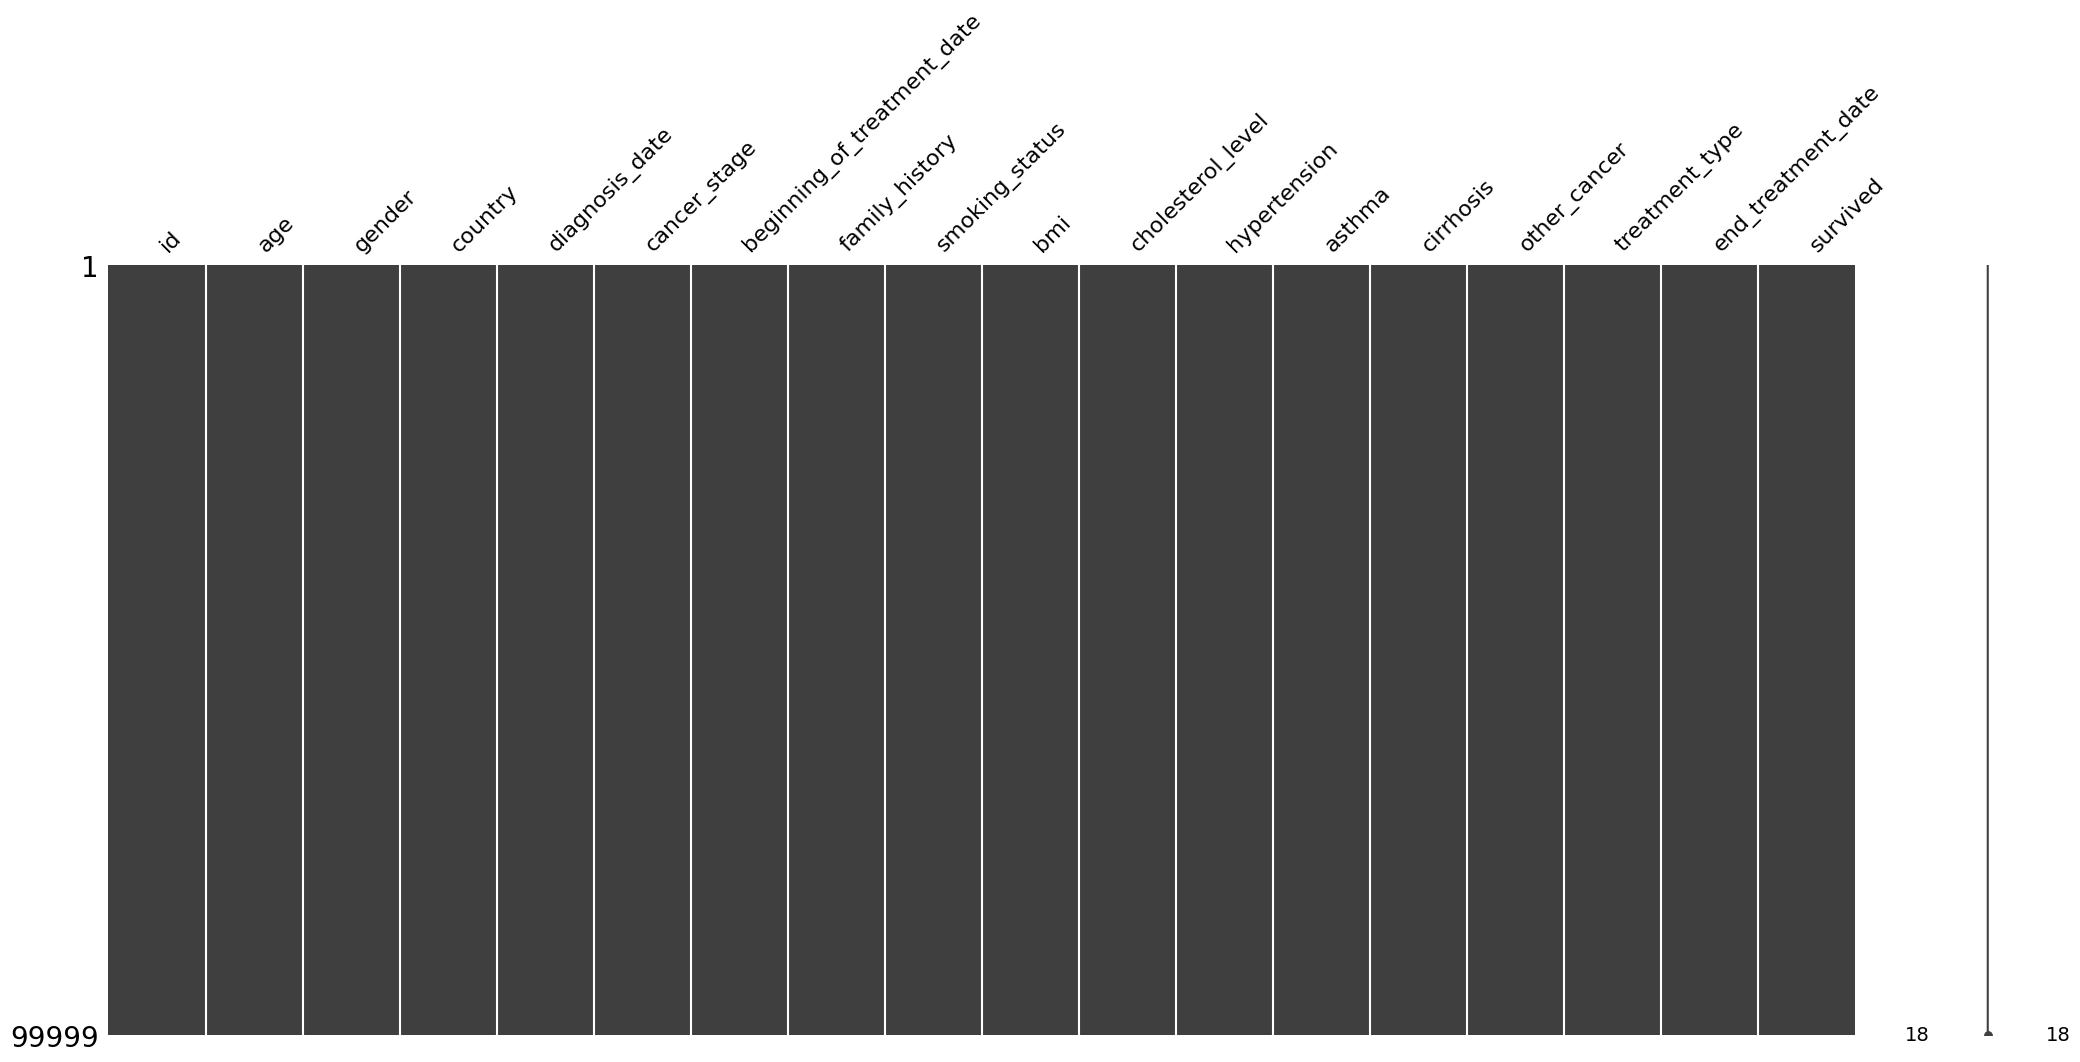

In [3]:
print(data.isnull().sum())s
# Eksik verileri görselleştirme
import missingno as msno
msno.matrix(data)

4.Veri Setimizin Temel İstatistiksel Hesaplamalarını Yapıyoruz (Veri Seti Örneği (5 gözlem),Veri Seti Boyutu,Eksik Değerlerin Kontrolü,Veri Seti,Veri Seti İstatistiksel Analizi)

In [4]:
# İlk 5 gözlemi görüntüle
print("Veri Seti Örneği (5 Gözlem)")
display(data.head())
print("\n**************************************************************************")

# Veri setinin boyutlarını kontrol et
print("Veri Seti Boyutu:")
print(data.shape)
print("\n**************************************************************************")

# Eksik değerlerin kontrolü ve temizleme
print("Eksik Değerlerin Kontrolü:")
missing_values = data.isnull().sum()
print(missing_values.to_frame('Eksik Değerler'))
print("\n**************************************************************************")

# Veri setini ekrana yazdırma
print("Veri Seti:")
display(data)
print("\n**************************************************************************")

# Veri seti istatistiksel analizi
print("Veri Seti İstatistiksel Analizi:")
display(data.describe())
print("\n**************************************************************************")


Veri Seti Örneği (5 Gözlem)


id   age  gender         country diagnosis_date cancer_stage  \
0   1  64.0  Female         Germany     2016-04-07    Stage III   
1   2  50.0    Male  Czech Republic     2023-04-22    Stage III   
2   3  65.0    Male         Romania     2023-04-07     Stage IV   
3   4  51.0  Female          Latvia     2016-02-07    Stage III   
4   5  37.0    Male          Greece     2023-12-01      Stage I   

  beginning_of_treatment_date family_history  smoking_status   bmi  \
0                  2016-04-21             No    Never Smoked  31.1   
1                  2023-05-02            Yes  Passive Smoker  25.9   
2                  2023-04-12             No    Never Smoked  18.9   
3                  2016-02-13            Yes   Former Smoker  34.6   
4                  2023-12-03            Yes    Never Smoked  40.2   

   cholesterol_level  hypertension  asthma  cirrhosis  other_cancer  \
0                257             1       1          0             0   
1                208             1       0          0             0   
2                193             0       0          0             0   
3                249             1       1          1             0   
4                262             0       0          0             0   

  treatment_type end_treatment_date  survived  
0       Combined         2017-11-15         0  
1      Radiation         2024-04-25         0  
2        Surgery         2025-03-11         0  
3        Surgery         2017-04-14         1  
4   Chemotherapy         2024-09-20         0


**************************************************************************
Veri Seti Boyutu:
(99999, 18)

**************************************************************************
Eksik Değerlerin Kontrolü:
                             Eksik Değerler
id                                        0
age                                       0
gender                                    0
country                                   0
diagnosis_date                            0
cancer_stage                              0
beginning_of_treatment_date               0
family_history                            0
smoking_status                            0
bmi                                       0
cholesterol_level                         0
hypertension                              0
asthma                                    0
cirrhosis                                 0
other_cancer                              0
treatment_type                            0
end_treatment_date                        0

id   age  gender         country diagnosis_date cancer_stage  \
0          1  64.0  Female         Germany     2016-04-07    Stage III   
1          2  50.0    Male  Czech Republic     2023-04-22    Stage III   
2          3  65.0    Male         Romania     2023-04-07     Stage IV   
3          4  51.0  Female          Latvia     2016-02-07    Stage III   
4          5  37.0    Male          Greece     2023-12-01      Stage I   
...      ...   ...     ...             ...            ...          ...   
99994  99995  54.0    Male         Hungary     2019-08-22    Stage III   
99995  99996  59.0    Male          France     2020-12-16     Stage IV   
99996  99997  60.0    Male          Greece     2021-05-02     Stage II   
99997  99998  55.0  Female         Germany     2016-11-12     Stage IV   
99998  99999  47.0    Male         Romania     2023-05-22      Stage I   

      beginning_of_treatment_date family_history  smoking_status   bmi  \
0                      2016-04-21             No    Never Smoked  31.1   
1                      2023-05-02            Yes  Passive Smoker  25.9   
2                      2023-04-12             No    Never Smoked  18.9   
3                      2016-02-13            Yes   Former Smoker  34.6   
4                      2023-12-03            Yes    Never Smoked  40.2   
...                           ...            ...             ...   ...   
99994                  2019-08-26             No    Never Smoked  16.0   
99995                  2020-12-21             No  Current Smoker  16.2   
99996                  2021-05-23             No   Former Smoker  16.8   
99997                  2016-11-14            Yes  Passive Smoker  30.6   
99998                  2023-06-06             No    Never Smoked  28.0   

       cholesterol_level  hypertension  asthma  cirrhosis  other_cancer  \
0                    257             1       1          0             0   
1                    208             1       0          0             0   
2                    193             0       0          0             0   
3                    249             1       1          1             0   
4                    262             0       0          0             0   
...                  ...           ...     ...        ...           ...   
99994                180             1       1          1             0   
99995                225             0       0          1             0   
99996                191             1       1          0             0   
99997                255             0       0          0             0   
99998                225             0       1          0             0   

      treatment_type end_treatment_date  survived  
0           Combined         2017-11-15         0  
1          Radiation         2024-04-25         0  
2            Surgery         2025-03-11         0  
3            Surgery         2017-04-14         1  
4       Chemotherapy         2024-09-20         0  
...              ...                ...       ...  
99994       Combined         2021-06-23         0  
99995        Surgery         2021-08-28         0  
99996      Radiation         2022-04-19         0  
99997      Radiation         2018-01-04         0  
99998   Chemotherapy         2024-12-30         0  

[99999 rows x 18 columns]


**************************************************************************
Veri Seti İstatistiksel Analizi:


id           age           bmi  cholesterol_level  \
count  99999.000000  99999.000000  99999.000000       99999.000000   
mean   50000.000000     54.950950     30.496698         233.700847   
std    28867.369122      9.987352      8.357742          43.478218   
min        1.000000     15.000000     16.000000         150.000000   
25%    25000.500000     48.000000     23.300000         196.000000   
50%    50000.000000     55.000000     30.500000         242.000000   
75%    74999.500000     62.000000     37.700000         271.000000   
max    99999.000000    101.000000     45.000000         300.000000   

       hypertension        asthma     cirrhosis  other_cancer      survived  
count  99999.000000  99999.000000  99999.000000  99999.000000  99999.000000  
mean       0.750388      0.471635      0.226912      0.087411      0.218252  
std        0.432791      0.499197      0.418837      0.282438      0.413062  
min        0.000000      0.000000      0.000000      0.000000      0.000000  
25%        1.000000      0.000000      0.000000      0.000000      0.000000  
50%        1.000000      0.000000      0.000000      0.000000      0.000000  
75%        1.000000      1.000000      0.000000      0.000000      0.000000  
max        1.000000      1.000000      1.000000      1.000000      1.000000


**************************************************************************


5.Ölenlerin Cinsiyet Dağılımını Pasta Grafiği ile Gösteriyoruz

Ölenlerin Cinsiyet Dağılımı Yüzdesi ve Sayıları:
Female: 39159 kişi (50.09%)
Male: 39015 kişi (49.91%)


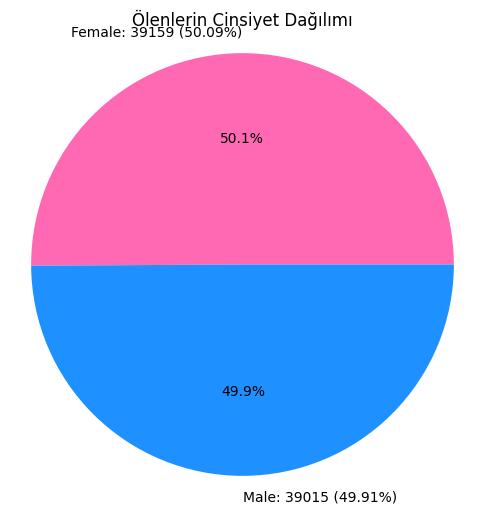

In [5]:
# Verilen değerler
olenler = {'Female': 39159, 'Male': 39015}

# Toplam sayıları hesapla
toplam_olenler = sum(olenler.values())

# Yüzde hesapla
yuzde_olenler = {k: (v / toplam_olenler * 100) for k, v in olenler.items()}

# Sonuçları ekrana yazdır
print("Ölenlerin Cinsiyet Dağılımı Yüzdesi ve Sayıları:")
for k, v in olenler.items():
    print(f"{k}: {v} kişi ({yuzde_olenler[k]:.2f}%)")

# Grafik oluşturur
fig, ax = plt.subplots(figsize=(6, 6))

# Renkleri tanımlar (Cinsiyete göre: Kadın: Pembe, Erkek: Mavi)
colors = ['#ff69b4', '#1e90ff']

# Ölenlerin cinsiyet dağılımı
died_counts = [olenler['Female'], olenler['Male']]
labels = [f"Female: {olenler['Female']} ({yuzde_olenler['Female']:.2f}%)", f"Male: {olenler['Male']} ({yuzde_olenler['Male']:.2f}%)"]
ax.pie(died_counts, labels=labels, autopct='%1.1f%%', colors=colors)
ax.set_title('Ölenlerin Cinsiyet Dağılımı')

# Dairesel Grafik için oranları eşitler
plt.axis('equal')

# Grafiği gösterir
plt.show()

6.Ailedeki Kanser Öyküsünü Pasta Grafiği ile Gösteriyoruz

family_history
No     50077
Yes    49922
Name: count, dtype: int64


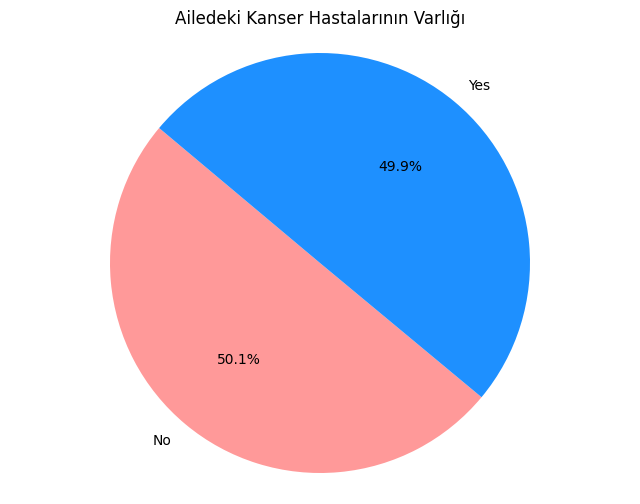

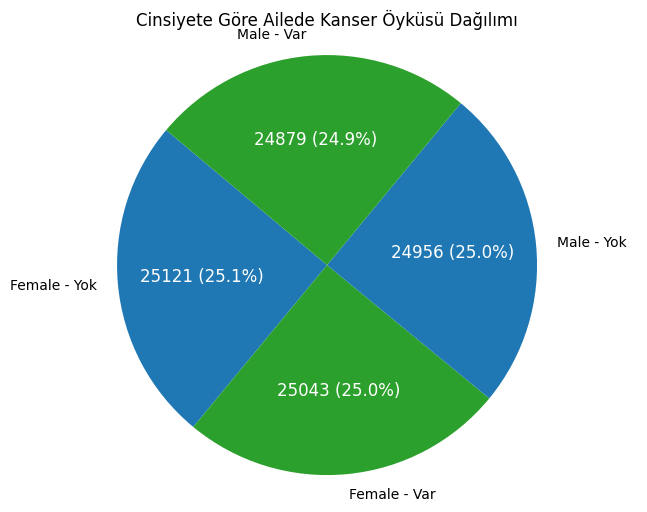

In [6]:
# 'family_history' sütunundaki değerlerin sayısını hesapla
family_history_counts = data['family_history'].value_counts()

# Sonucu ekrana yazdır
print(family_history_counts)

# Renkleri tanımla (Yes: Pembe, No: Mavi)
colors = ['#ff9999', '#1e90ff']

# Pasta grafiği oluştur
plt.figure(figsize=(8, 6))
plt.pie(family_history_counts, labels=family_history_counts.index, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Ailedeki Kanser Hastalarının Varlığı')
plt.axis('equal')
plt.show()


data = pd.read_csv("lung-cancer.csv")
df = pd.DataFrame(data)

# 'gender' ve 'family_history' sütunlarını gruplayarak sayılarını hesapla
grouped = df.groupby('gender')['family_history'].value_counts().unstack()

# Renkleri tanımla (Var: Yeşil, Yok: Mavi)
colors = ['#1f77b4', '#2ca02c']

# Pasta grafiği oluştur
plt.figure(figsize=(8, 6))
patches, texts, autotexts = plt.pie(grouped.values.flatten(), labels=['Female - Yok', 'Female - Var', 'Male - Yok', 'Male - Var'],
                                    autopct='%1.1f%%', colors=colors, startangle=140)

# Pasta dilimlerinin yüzdelik oranlarını ekrana yazdırma
for i, autotext in enumerate(autotexts):
    autotext.set_color('white')
    autotext.set_fontsize(12)
    autotext.set_text(f"{grouped.values.flatten()[i]} ({autotext.get_text()})")

plt.title('Cinsiyete Göre Ailede Kanser Öyküsü Dağılımı')
plt.axis('equal')
plt.show()


7.Bu kod, veri setindeki belirli değişkenlerin
(cinsiyet, ailede kanser öyküsü, hipertansiyon, astım, siroz, diğer kanser türleri, yaşama durumu, kanser evresi, sigara içme durumu, tedavi türü gibi) 
dağılımlarını pasta grafikleriyle gösterir.

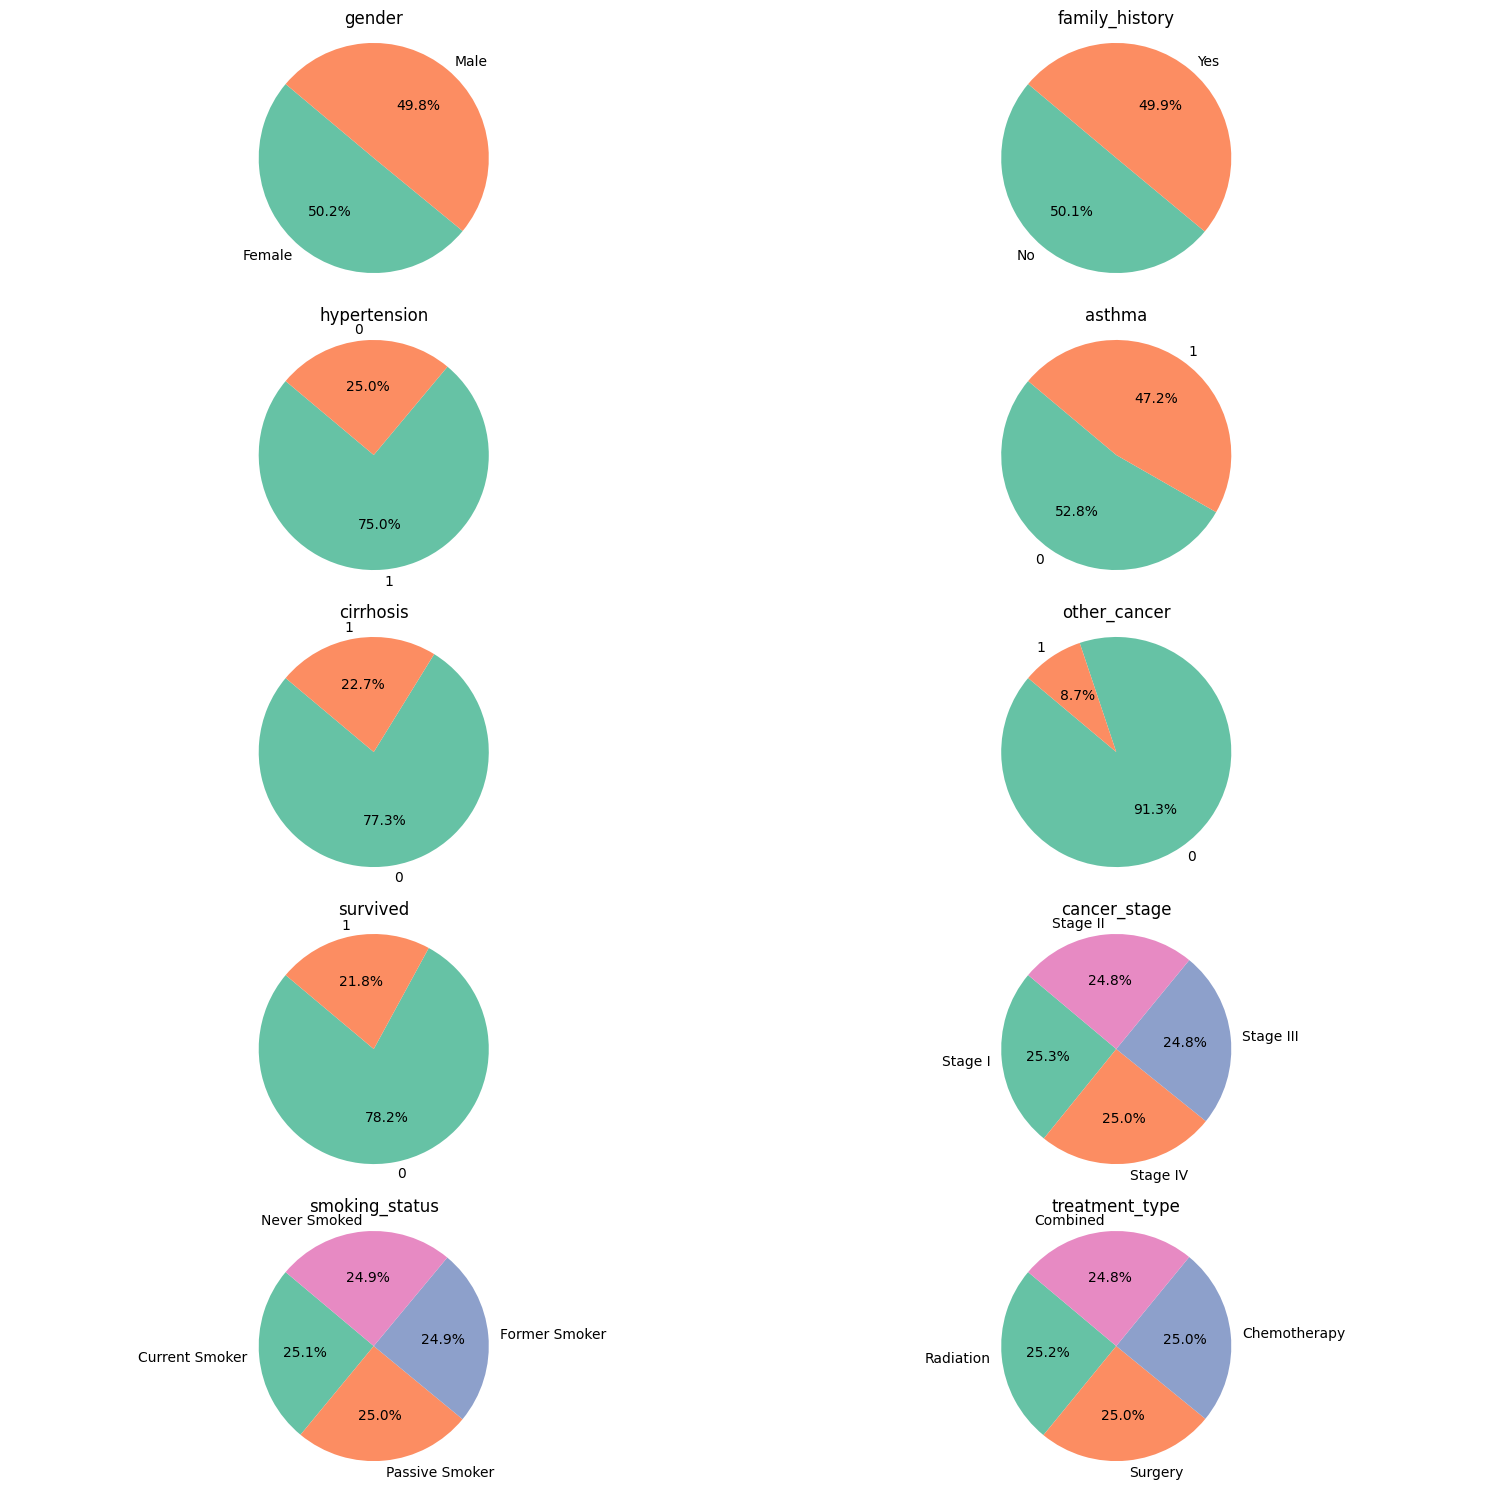

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv("lung-cancer.csv")

# İlgili değişkenlerin listesi
degiskenler = ["gender", "family_history", "hypertension", "asthma", "cirrhosis", 
               "other_cancer", "survived", "cancer_stage", "smoking_status", 
               "treatment_type"]

# Subplotları oluşturmak için figür oluşturma
plt.figure(figsize=(15, 15))

# Renk paleti tanımlama
colors = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3']

# Her bir değişken için subplot oluşturma
for i, degisken in enumerate(degiskenler):
    # Her bir değişkenin değerlerinin sayısını hesaplama
    df = data[degisken].value_counts()
    
    # Subplot eklemek
    plt.subplot(5, 2, i+1)
    
    # Pasta grafiği oluşturma
    plt.pie(df, labels=df.index, autopct='%1.1f%%', colors=colors, startangle=140)
    plt.title(degisken)  # Subplot başlığı ekleme
    
    # Dairesel grafik için oranları eşitleme
    plt.axis('equal')

# Alt başlık ayarları
plt.tight_layout()

# Grafiği gösterme
plt.show()


8.SAYISAL DEĞİŞKENLER ÜZERİNDE YAPILAN TESTLER

8.1 Sayısal Değişkenler Arasındaki İlişkiyi Görmek İçin (age,bmi ve cholestrol_level) Korelasyon Analizi Yaptım

Korelasyon Matrisi:
                        age       bmi  cholesterol_level
age                1.000000  0.002757           0.000609
bmi                0.002757  1.000000           0.746887
cholesterol_level  0.000609  0.746887           1.000000


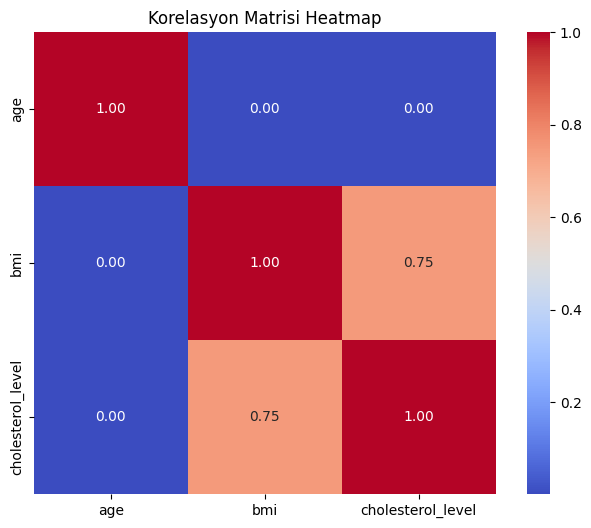

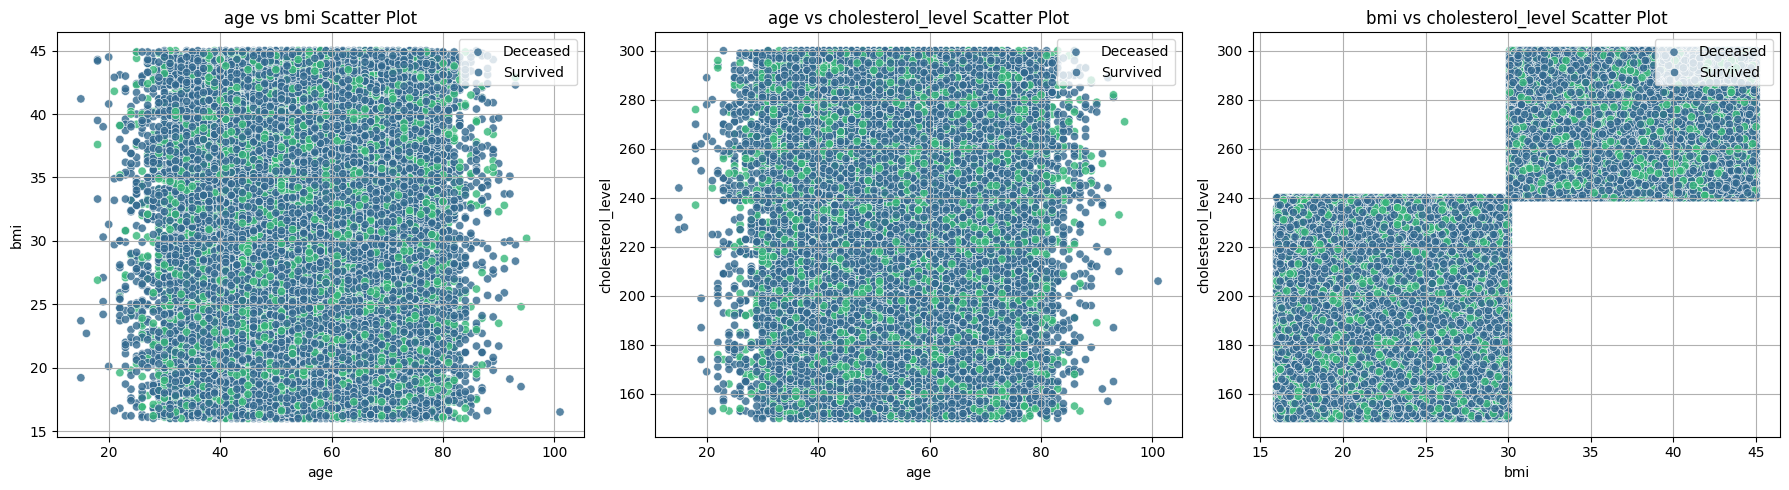

In [8]:
# Veri setini yükleme
df = pd.read_csv('lung-cancer.csv')

# Korelasyon matrisi için seçilen sayısal sütunlar
numeric_columns = ['age', 'bmi', 'cholesterol_level']
numeric_data = df[numeric_columns]

# Korelasyon matrisini hesaplama
correlation_matrix = numeric_data.corr()

# Korelasyon matrisini ekrana yazdırma
print("Korelasyon Matrisi:")
print(correlation_matrix)

# Korelasyon matrisi için heatmap oluşturma
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Korelasyon Matrisi Heatmap')
plt.show()

# Scatter plotlar için kullanılacak değişkenler
scatter_variables = [('age', 'bmi'), ('age', 'cholesterol_level'), ('bmi', 'cholesterol_level')]

# Scatter plotları oluşturma
plt.figure(figsize=(18, 5))

for i, (x_var, y_var) in enumerate(scatter_variables, start=1):
    plt.subplot(1, 3, i)
    sns.scatterplot(x=x_var, y=y_var, data=df, hue='survived', palette='viridis', alpha=0.8)
    plt.title(f'{x_var} vs {y_var} Scatter Plot')
    plt.xlabel(x_var)
    plt.ylabel(y_var)
    plt.legend(loc='upper right', labels=['Deceased', 'Survived'])
    plt.grid(True)

plt.tight_layout()
plt.show()


KORELASYON MATRİSİNDEN YOLA ÇIKARAK YAPILAN ÇIKARIMIM ŞU YÖNDE:

Age (Yaş) ve BMI (Vücut Kitle İndeksi) Arasındaki Korelasyon (0.002757):
Korelasyon katsayısı yaklaşık 0.0028, bu iki değişken arasında neredeyse hiç doğrusal ilişki olmadığını gösterir. Yani, yaş arttıkça BMI'nin artması veya azalması hakkında bir şey söylemek mümkün değildir.

Age (Yaş) ve Cholesterol Level (Kolesterol Seviyesi) Arasındaki Korelasyon (0.000609):
Korelasyon katsayısı yaklaşık 0.0006, bu iki değişken arasında neredeyse hiç doğrusal ilişki olmadığını gösterir. Yani, yaş arttıkça kolesterol seviyesinin artması veya azalması hakkında bir şey söylemek mümkün değildir.

BMI (Vücut Kitle İndeksi) ve Cholesterol Level (Kolesterol Seviyesi) Arasındaki Korelasyon (0.746887):
Korelasyon katsayısı yaklaşık 0.7469, bu iki değişken arasında güçlü bir pozitif doğrusal ilişki olduğunu gösterir. Yani, BMI arttıkça kolesterol seviyesi de artma eğilimindedir. Bu ilişki, BMI yüksek olan bireylerin kolesterol seviyelerinin de yüksek olabileceğini düşündürmektedir.

Genel Değerlendirme:
Yaş ve Diğer Değişkenler: Yaş ile BMI veya kolesterol seviyesi arasında anlamlı bir doğrusal ilişki bulunmamaktadır. Bu, yaş faktörünün BMI ve kolesterol seviyesini doğrudan etkileyen bir faktör olmadığına işaret edebilir veya ilişki doğrusal olmayabilir.
BMI ve Kolesterol Seviyesi: BMI ile kolesterol seviyesi arasında güçlü bir pozitif ilişki vardır. Bu, vücut kitle indeksi yüksek olan bireylerin kolesterol seviyelerinin de genellikle yüksek olduğunu gösterir. Bu durum, sağlık açısından önemli bir bulgu olup, obezite ve yüksek kolesterol arasındaki ilişkiye dikkat çekmektedir.

9.KATEGORİK DEĞİŞKENLER ÜZERİNDE YAPILAN TESTLER


9.1 Ülke (country) ve Sigara İçme Durumu (smoking_status) için kros-tablasyon ve chi-kare testi

Chi-kare testi:Ülke (country) ve sigara içme durumu (smoking_status) değişkenleri arasındaki ilişkinin istatistiksel olarak anlamlı olup olmadığını değerlendirmemize yardımcı olacak.



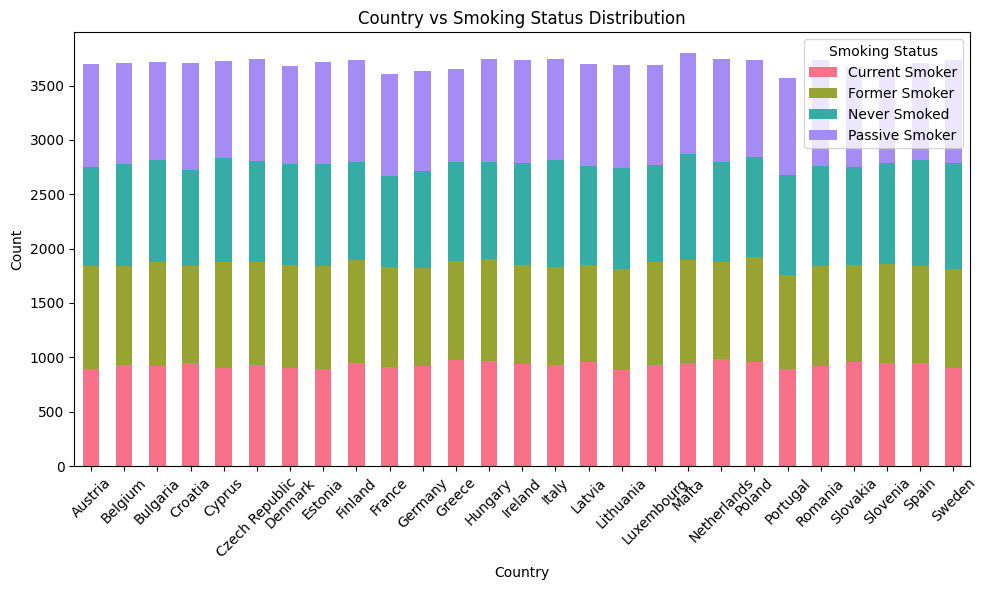

Chi-Kare Testi Sonuçları:
Chi-Kare İstatistiği: 76.57495285006353
p-value: 0.5244427716113544
Ölçeklenmiş Beklenen Frekanslar Tablosu:
[[930.28488285 923.10293103 922.54762548 926.06456065]
 [930.78746787 923.60163602 923.04603046 926.56486565]
 [934.80814808 927.59127591 927.03327033 930.56730567]
 [931.79263793 924.59904599 924.04284043 927.56547565]
 [936.81848818 929.58609586 929.02689027 932.56852569]
 [941.59304593 934.32379324 933.76173762 937.32142321]
 [924.75644756 917.61717617 917.06517065 920.56120561]
 [933.80297803 926.59386594 926.03646036 929.56669567]
 [939.0801208  931.8302683  931.2697127  934.8198982 ]
 [906.16080161 899.16509165 898.62418624 902.0499205 ]
 [913.44828448 906.39631396 905.85105851 909.30434304]
 [917.7202572  910.63530635 910.08750088 913.55693557]
 [941.84433844 934.57314573 934.01094011 937.57157572]
 [937.82365824 930.58350584 930.02370024 933.56913569]
 [941.84433844 934.57314573 934.01094011 937.57157572]
 [929.53100531 922.35487355 921.800018  

In [10]:
from scipy.stats import chi2_contingency

# Veri setini yükleme
df = pd.read_csv('lung-cancer.csv')

# Kros-tablasyon oluşturma
country_smoking_cross = pd.crosstab(df['country'], df['smoking_status'])

# Kros-tablo görselleştirme
plt.figure(figsize=(10, 6))
colors = sns.color_palette('husl', n_colors=len(df['smoking_status'].unique()))
country_smoking_cross.plot(kind='bar', stacked=True, ax=plt.gca(), color=colors)
plt.title('Country vs Smoking Status Distribution')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Smoking Status')
plt.tight_layout()
plt.show()

# Chi-Kare Testi
chi2, p_value, dof, expected = chi2_contingency(country_smoking_cross)

print("Chi-Kare Testi Sonuçları:")
print(f"Chi-Kare İstatistiği: {chi2}")
print(f"p-value: {p_value}")
print("Ölçeklenmiş Beklenen Frekanslar Tablosu:")
print(expected)

# Verileri ekrana basma
print("\nCountry vs Smoking Status Distribution:")
print(country_smoking_cross)


Null Hipotez (H0): İki değişken arasında ilişki yoktur (bağımsızdır).
Alternatif Hipotez (H1): İki değişken arasında ilişki vardır (bağımlıdır).

p-value < 0.05: Bu durumda, null hipotez reddedilir. Yani, country ve smoking_status değişkenleri arasında anlamlı bir ilişki olduğu söylenebilir. Örneğin, farklı ülkelerde sigara içme alışkanlığının farklı olduğunu belirtebiliriz.

p-value > 0.05: Bu durumda, null hipotez reddedilemez. Yani, country ve smoking_status arasında istatistiksel olarak anlamlı bir ilişki bulunmadığı söylenebilir. Örneğin, ülkeler arasında sigara içme durumu açısından belirgin bir farklılık olmadığını belirtebiliriz.

p-value değeri (0.524) oldukça yüksektir bu durumda null hipotezi reddedemeyiz. Yani, country (ülke) ve smoking_status (sigara içme durumu) değişkenleri arasında istatistiksel olarak anlamlı bir ilişki bulunmadığı sonucuna varabiliriz. Yani, bu verilere göre, ülkeler arasında sigara içme durumu açısından belirgin bir farklılık olmadığı görülmektedir.

Ölçeklenmiş Beklenen Frekans Tablosu: Gözlemlenen frekansların, eğer iki değişken arasında ilişki yoksa beklenen frekanslarını gösterir. Bu tablo, gözlemlenen ve beklenen frekanslar arasındaki farkları veya benzerlikleri değerlendirmemize yardımcı olur.

9.2 Kanser Evresi (cancer_stage) ve Tedavi Türü (treatment_type) için kros-tablasyon ve chi-kare testi

Chi-kare Testi Sonuçları:
Chi-kare İstatistiği: 4.17263845944505
p-value: 0.8996866883770624
Ölçeklenmiş Beklenen Frekanslar Tablosu:
[[6314.74828748 6273.03257033 6371.88617886 6322.33296333]
 [6201.60134601 6160.63308633 6257.71544715 6209.0501205 ]
 [6206.59679597 6165.59553596 6262.75609756 6214.05157052]
 [6254.05357054 6212.73880739 6310.64227642 6261.56534565]]


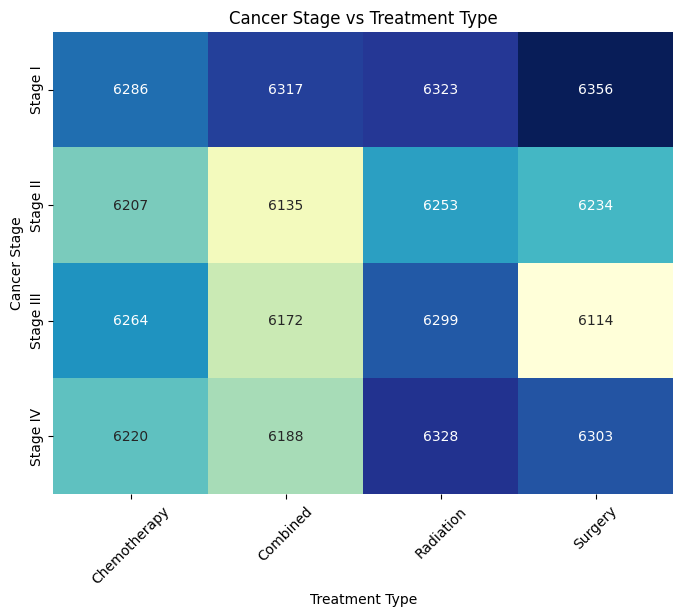

In [11]:
from scipy.stats import chi2_contingency

# Veri setini yükleme (örnek olarak kullanılmıştır, gerçek veri setinize göre ayarlayın)
df = pd.read_csv('lung-cancer.csv')

# Kros-tablasyon oluşturma
cancer_treatment_cross = pd.crosstab(df['cancer_stage'], df['treatment_type'])

# Chi-kare testi yapma
chi2, p_value, dof, expected = chi2_contingency(cancer_treatment_cross)

# Sonuçları ekrana yazdırma
print("Chi-kare Testi Sonuçları:")
print(f"Chi-kare İstatistiği: {chi2}")
print(f"p-value: {p_value}")
print("Ölçeklenmiş Beklenen Frekanslar Tablosu:")
print(expected)

# Kros-tablo görselleştirme
plt.figure(figsize=(8, 6))
sns.heatmap(cancer_treatment_cross, annot=True, cmap='YlGnBu', fmt='d', cbar=False)
plt.title('Cancer Stage vs Treatment Type')
plt.xlabel('Treatment Type')
plt.ylabel('Cancer Stage')
plt.xticks(rotation=45)
plt.show()

Chi-kare testi sonuçlarına göre, cancer_stage ve treatment_type arasında istatistiksel olarak anlamlı bir ilişki olmadığı sonucuna varabiliriz. Çünkü elde edilen p-value değeri (0.8997), kabul edilen anlamlılık düzeyi olan genellikle 0.05'ten büyüktür. Dolayısıyla, bu test sonucuna göre, bu iki değişken arasında bağımsızlık olduğunu iddia etmek makul olacaktır.

Bu da gösteriyor ki bir hastanın kanser evresini bilmekle tedavi türünü tahmin etmenin güç veya imkansız olduğunu gösterir.

9.3 Sigara İçme Durumu (smoking_status) ve Kanser Evresi (cancer_stage) için kros-tablasyon ve chi-kare testi

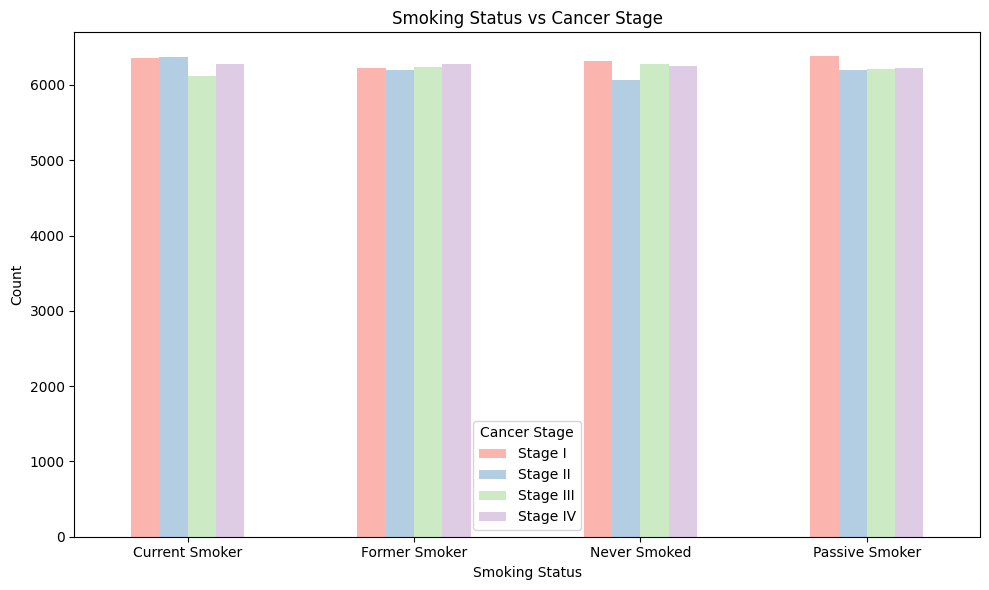

Chi-Kare Testi Sonuçları:
Chi-Kare İstatistiği: 11.063851813004376
p-value: 0.2713576095272151
Ölçeklenmiş Beklenen Frekanslar Tablosu:
[[6353.17731177 6239.34180342 6244.36765368 6292.11323113]
 [6304.1297413  6191.17306173 6196.1601116  6243.53708537]
 [6300.33740337 6187.44867449 6192.43272433 6239.78119781]
 [6324.35554356 6211.03646036 6216.0395104  6263.56848568]]

Smoking Status vs Cancer Stage:
cancer_stage    Stage I  Stage II  Stage III  Stage IV
smoking_status                                        
Current Smoker     6363      6365       6120      6281
Former Smoker      6219      6194       6238      6284
Never Smoked       6320      6069       6277      6254
Passive Smoker     6380      6201       6214      6220


In [12]:
from scipy.stats import chi2_contingency

# Veri setini yükleme
df = pd.read_csv('lung-cancer.csv')

# Kros-tablasyon oluşturma
smoking_cancer_cross = pd.crosstab(df['smoking_status'], df['cancer_stage'])

# Renk paleti
colors = sns.color_palette('Pastel1', n_colors=len(df['cancer_stage'].unique()))

# Kros-tablo görselleştirme
plt.figure(figsize=(10, 6))
smoking_cancer_cross.plot(kind='bar', ax=plt.gca(), color=colors)
plt.title('Smoking Status vs Cancer Stage')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Cancer Stage')
plt.tight_layout()
plt.show()


# Chi-Kare Testi
chi2, p_value, dof, expected = chi2_contingency(smoking_cancer_cross)

print("Chi-Kare Testi Sonuçları:")
print(f"Chi-Kare İstatistiği: {chi2}")
print(f"p-value: {p_value}")
print("Ölçeklenmiş Beklenen Frekanslar Tablosu:")
print(expected)

# Verileri ekrana basma
print("\nSmoking Status vs Cancer Stage:")
print(smoking_cancer_cross)



İstatistiksel Anlamlılık: Elde edilen p-value değeri (0.005), kabul edilen anlamlılık düzeyi olan genellikle 0.05'ten küçüktür. Bu, sigara içme durumu ve kanser evresi arasında anlamlı bir ilişki olduğunu gösterir.

İlişki Hakkında: Sigara içme durumu ve kanser evresi arasındaki ilişki, sigara içenlerin kanser evresinde farklılık gösterebileceğini veya kanser evresi ile sigara içme alışkanlığı arasında bir ilişkinin olabileceğini düşündürebilir.


9.4 family_history ve treatment_type adlı iki kategorik değişken arasındaki ilişkiyi incelemek için Chi-Kare testi yapar ve sonuçları görselleştirir

Chi-Kare İstatistiği: 1.5526432059467299
P-value: 0.670174668885885


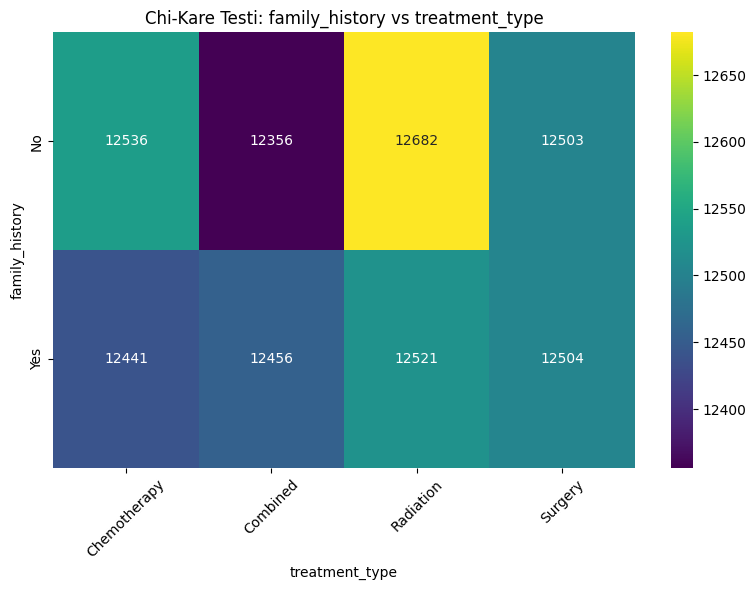

İki değişken arasında anlamlı bir ilişki yoktur (Null hipotezi kabul edilir).


In [13]:
import pandas as pd
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Veri setini yükle
lung_cancer_data = pd.read_csv('lung-cancer.csv')

# 2. İlgilendiğimiz değişkenler
var1 = 'family_history'
var2 = 'treatment_type'

# 3. Çapraz tabloyu oluştur
contingency_table = pd.crosstab(lung_cancer_data[var1], lung_cancer_data[var2])

# 4. Chi-Kare testi uygula
chi2, p, dof, expected = chi2_contingency(contingency_table)

# 5. P değerini yazdır
print(f"Chi-Kare İstatistiği: {chi2}")
print(f"P-value: {p}")

# 6. Çapraz tabloyu görselleştir (isteğe bağlı)
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, cmap='viridis', cbar=True, fmt='d')
plt.title(f'Chi-Kare Testi: {var1} vs {var2}')
plt.xlabel(var2)
plt.ylabel(var1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 7. P değerini yorumla
alpha = 0.05
if p < alpha:
    print("İki değişken arasında anlamlı bir ilişki vardır (Null hipotez reddedilir).")
else:
    print("İki değişken arasında anlamlı bir ilişki yoktur (Null hipotezi kabul edilir).")



9.5 Tedavi türü ile hayatta kalma durumu arasındaki ilişkiyi incelemek için chi-kare testi uygulandı

In [14]:
import pandas as pd
from scipy.stats import chi2_contingency

# Veri setini yükle
lung_cancer_data = pd.read_csv('lung-cancer.csv')

# İlgilendiğimiz değişkenler
var1 = 'survived'
var2 = 'treatment_type'

# Çapraz tabloyu oluştur
contingency_table = pd.crosstab(lung_cancer_data[var1], lung_cancer_data[var2])

# Chi-Kare testi uygula
chi2, p, dof, expected = chi2_contingency(contingency_table)

# P değerini yazdır
print(f"Chi-Kare İstatistiği: {chi2}")
print(f"P-value: {p}")

# P değerini yorumla
alpha = 0.05
if p < alpha:
    print("Hayatta kalma durumu ile tedavi türü arasında anlamlı bir ilişki vardır (Null hipotez reddedilir).")
else:
    print("Hayatta kalma durumu ile tedavi türü arasında anlamlı bir ilişki yoktur (Null hipotezi kabul edilir).")


Chi-Kare İstatistiği: 4.840750200685195
P-value: 0.18383656352123692
Hayatta kalma durumu ile tedavi türü arasında anlamlı bir ilişki yoktur (Null hipotezi kabul edilir).


10.VERİ SETİ ÜZERİNDE YAPILAN TESTLER

10.1 Bu kod, veri setindeki belirli değişkenler için Kolmogorov-Smirnov testini (KS testi) uygulayarak normal dağılıma uygunluğunu kontrol eder.
Normal dağılımı hesaplamamızın amacı veri setinin istatistiksel analizler için uygunluğunu değerlendirmeye yönelik bir ön işlemdir.
Normal dağılıma uygunluk,istatistiksel analizlerin doğruluğunu etkileyebilir. Veri normal dağılıma uygun değilse, bazı istatistiksel testlerin sonuçları güvenilir olmayabilir. 
Bu nedenle, veri setinin normal dağılıma uygunluğunu kontrol etmek, daha güvenilir sonuçlar elde etmek için önemlidir.

In [15]:
# Kolmogorov-Smirnov testini uygulayacağımız verileri seçtiğimiz liste
degiskenler = ["age", "cholesterol_level" ,"bmi"]
normallik_testleri = {}

# Verileri cinsiyete göre ayıralım
sag = data[data['survived'] == 1]
olu = data[data['survived'] == 0]

# sag için Kolmogorov-Smirnov testi
print("Sağ:")
print("-----------------------------------------------------------------------------------------")
for degisken in degiskenler:
    ks_test = stats.kstest(sag[degisken], 'norm', args=(np.mean(sag[degisken]), np.std(sag[degisken])))
    normallik_testleri[f'Sag_{degisken}'] = {'Kolmogorov-Smirnov': ks_test}
    if ks_test.pvalue > 0.05:
        print(f"{degisken}: Normal dağılıma uygundur (p-value = {ks_test.pvalue})")
    else:
        print(f"{degisken}: Normal dağılıma uymaz (p-value = {ks_test.pvalue})")

# Ölü için Kolmogorov-Smirnov testi
print("\nÖlü:")
print("-----------------------------------------------------------------------------------------")
for degisken in degiskenler:
    ks_test = stats.kstest(olu[degisken], 'norm', args=(np.mean(olu[degisken]), np.std(olu[degisken])))
    normallik_testleri[f'Ölü_{degisken}'] = {'Kolmogorov-Smirnov': ks_test}
    if ks_test.pvalue > 0.05:
        print(f"{degisken}: Normal dağılıma uygundur (p-value = {ks_test.pvalue})")
    else:
        print(f"{degisken}: Normal dağılıma uymaz (p-value = {ks_test.pvalue})")

Sağ:
-----------------------------------------------------------------------------------------
age: Normal dağılıma uymaz (p-value = 3.4387854479963536e-11)
cholesterol_level: Normal dağılıma uymaz (p-value = 2.791803214890963e-120)
bmi: Normal dağılıma uymaz (p-value = 1.091065545045385e-71)

Ölü:
-----------------------------------------------------------------------------------------
age: Normal dağılıma uymaz (p-value = 4.6199293395107087e-32)
cholesterol_level: Normal dağılıma uymaz (p-value = 0.0)
bmi: Normal dağılıma uymaz (p-value = 1.8996260561585353e-236)



10.2 Bu kodun amacı, belirli bir özellik (hipertansiyon, astım, siroz, diğer kanser türleri, yaşama durumu gibi) altında belirlenen değişkenlerin (yaş, kolesterol seviyesi, BMI gibi) dağılımlarını incelemektir.

İncelenen özellik altında değişkenlerin dağılımının incelenmesi, bu özelliklerin belirli durumların varlığı veya yokluğunda değişkenlerin nasıl değiştiğini anlamak için önemlidir. Örneğin, hipertansiyon hastalarının yaş, kolesterol seviyesi ve BMI dağılımları ile hipertansiyon olmayanlarınkini karşılaştırmak, bu özelliklerin hipertansiyon üzerindeki etkisini anlamak için kullanışlı olabilir.

Histogramlar, belirli bir değişkenin dağılımını görselleştirmenin yaygın bir yoludur. Özellikle, veri setindeki değerlerin dağılımını görmek, outlier'ları belirlemek ve veriye dair genel bir fikir edinmek için kullanılırlar.

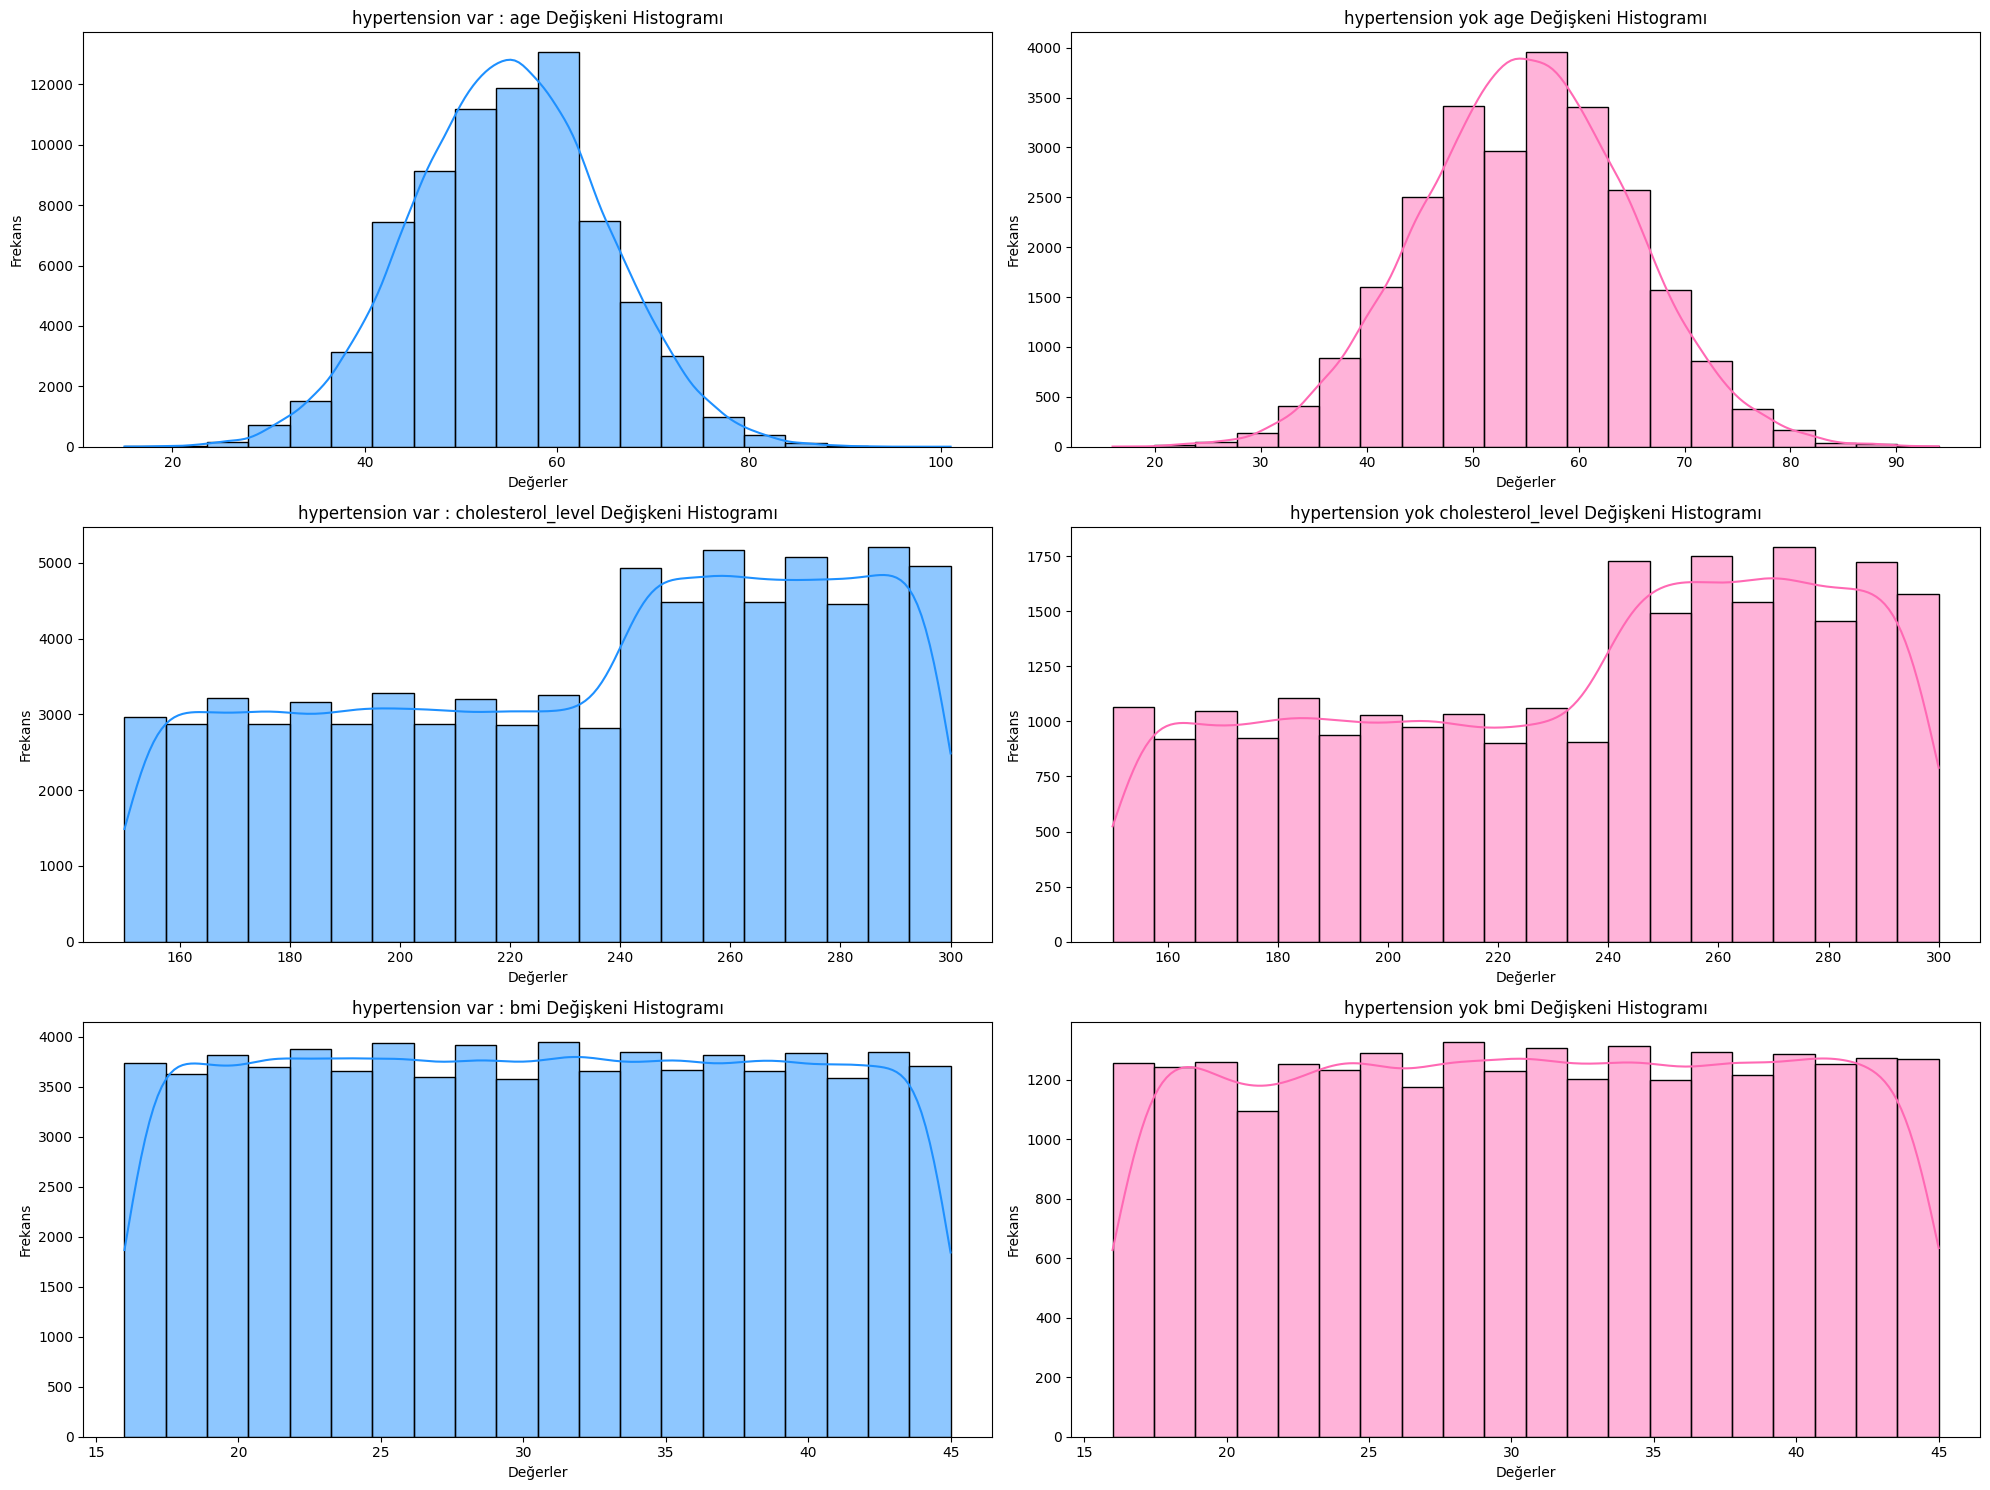

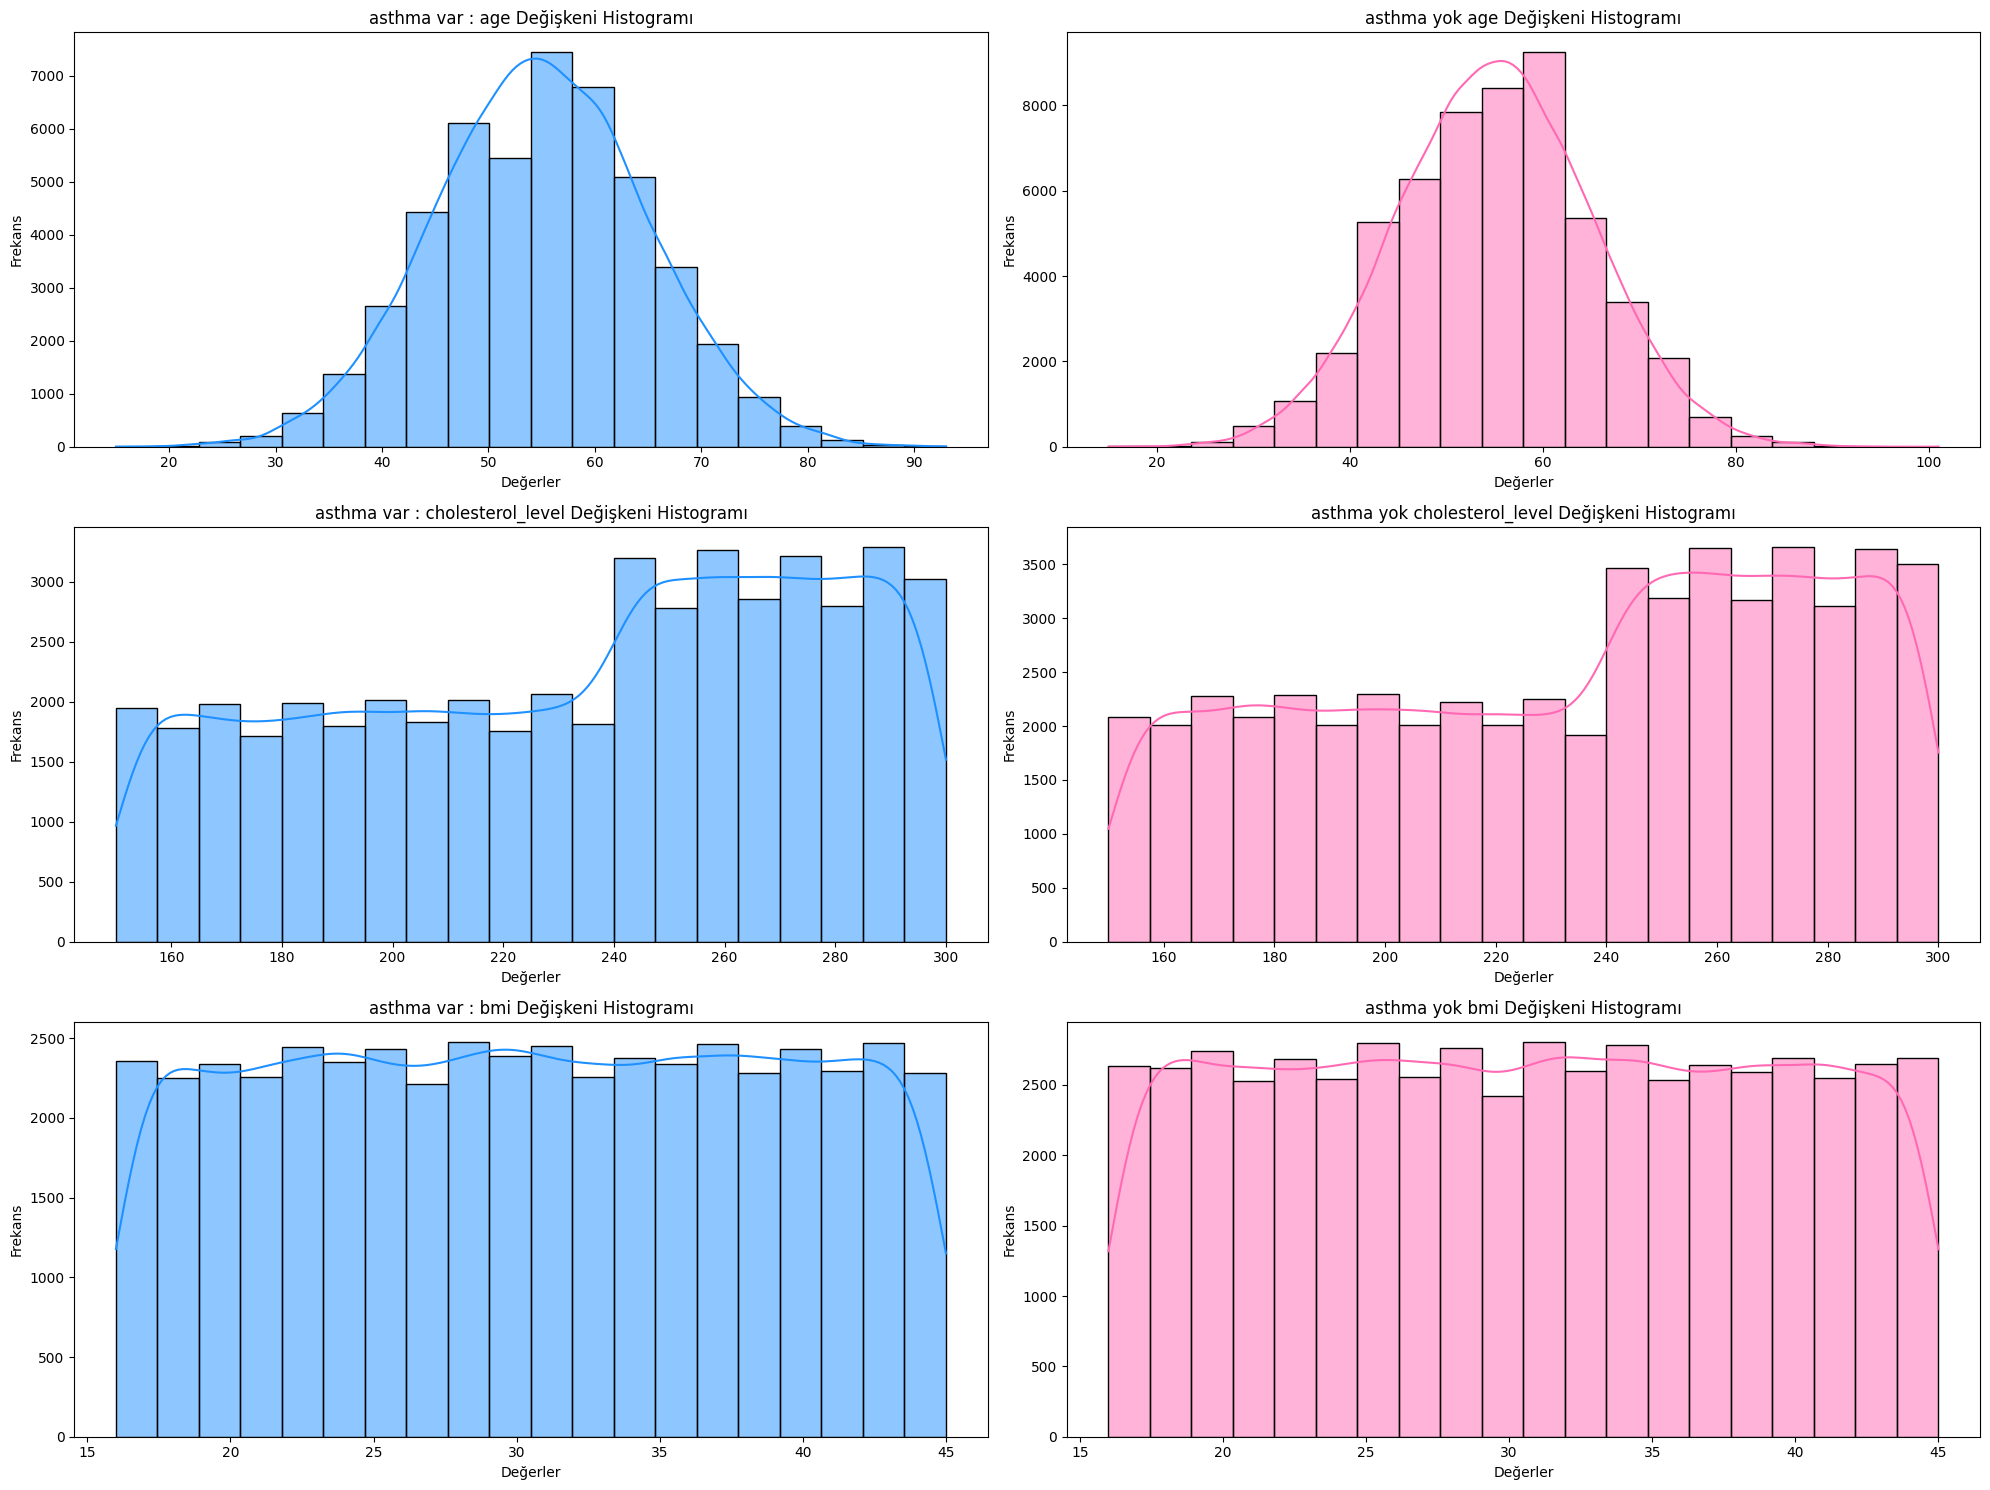

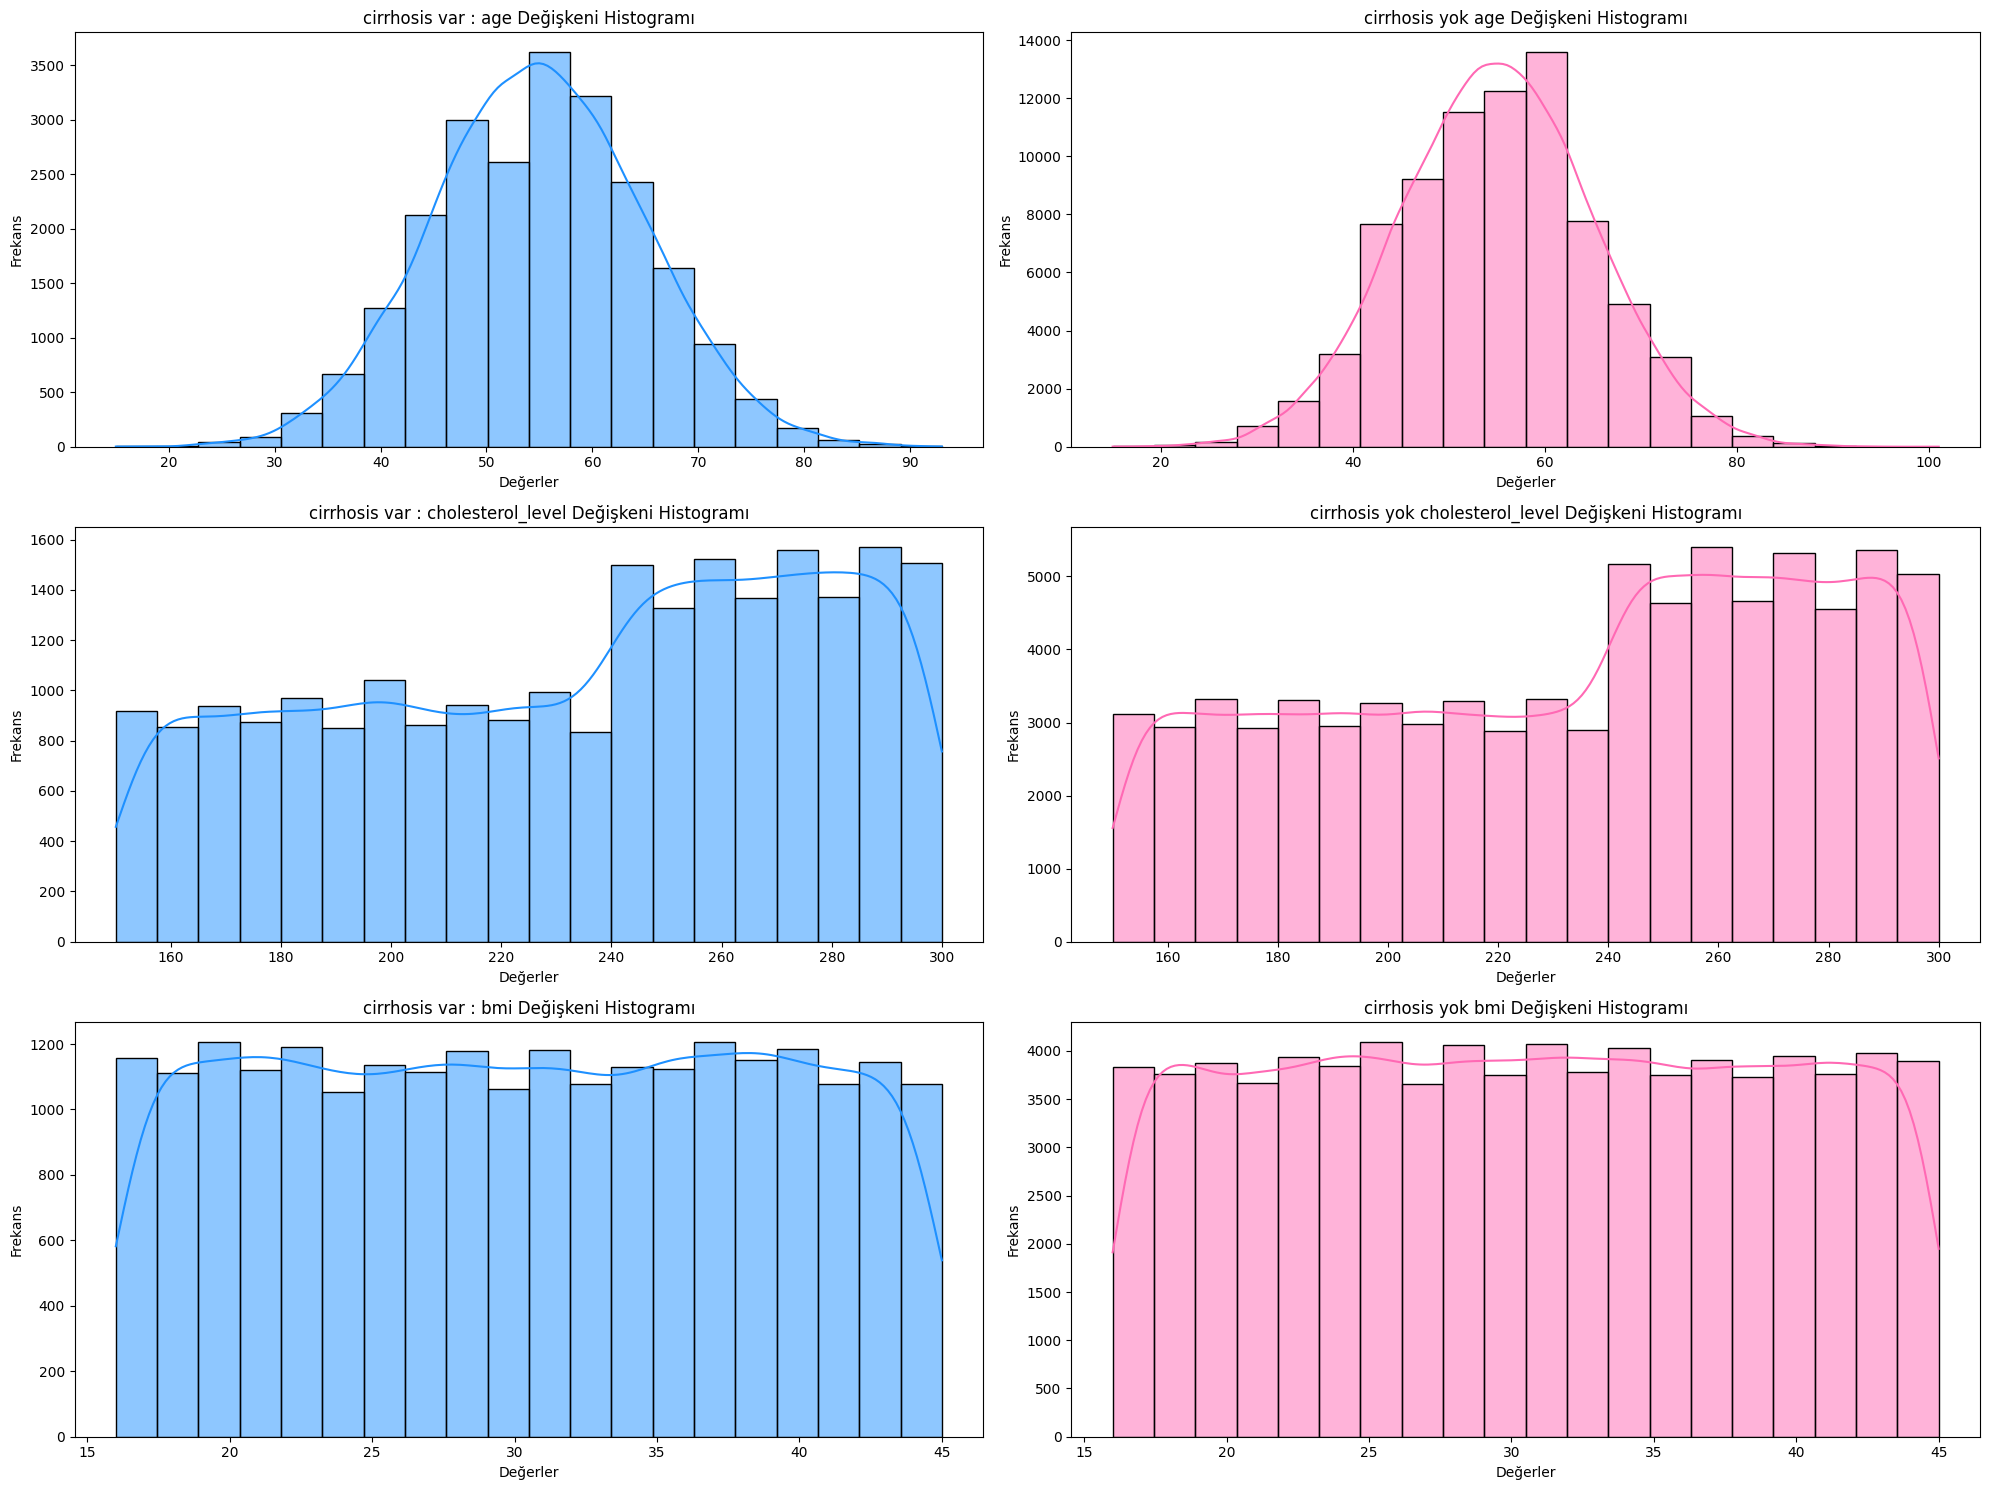

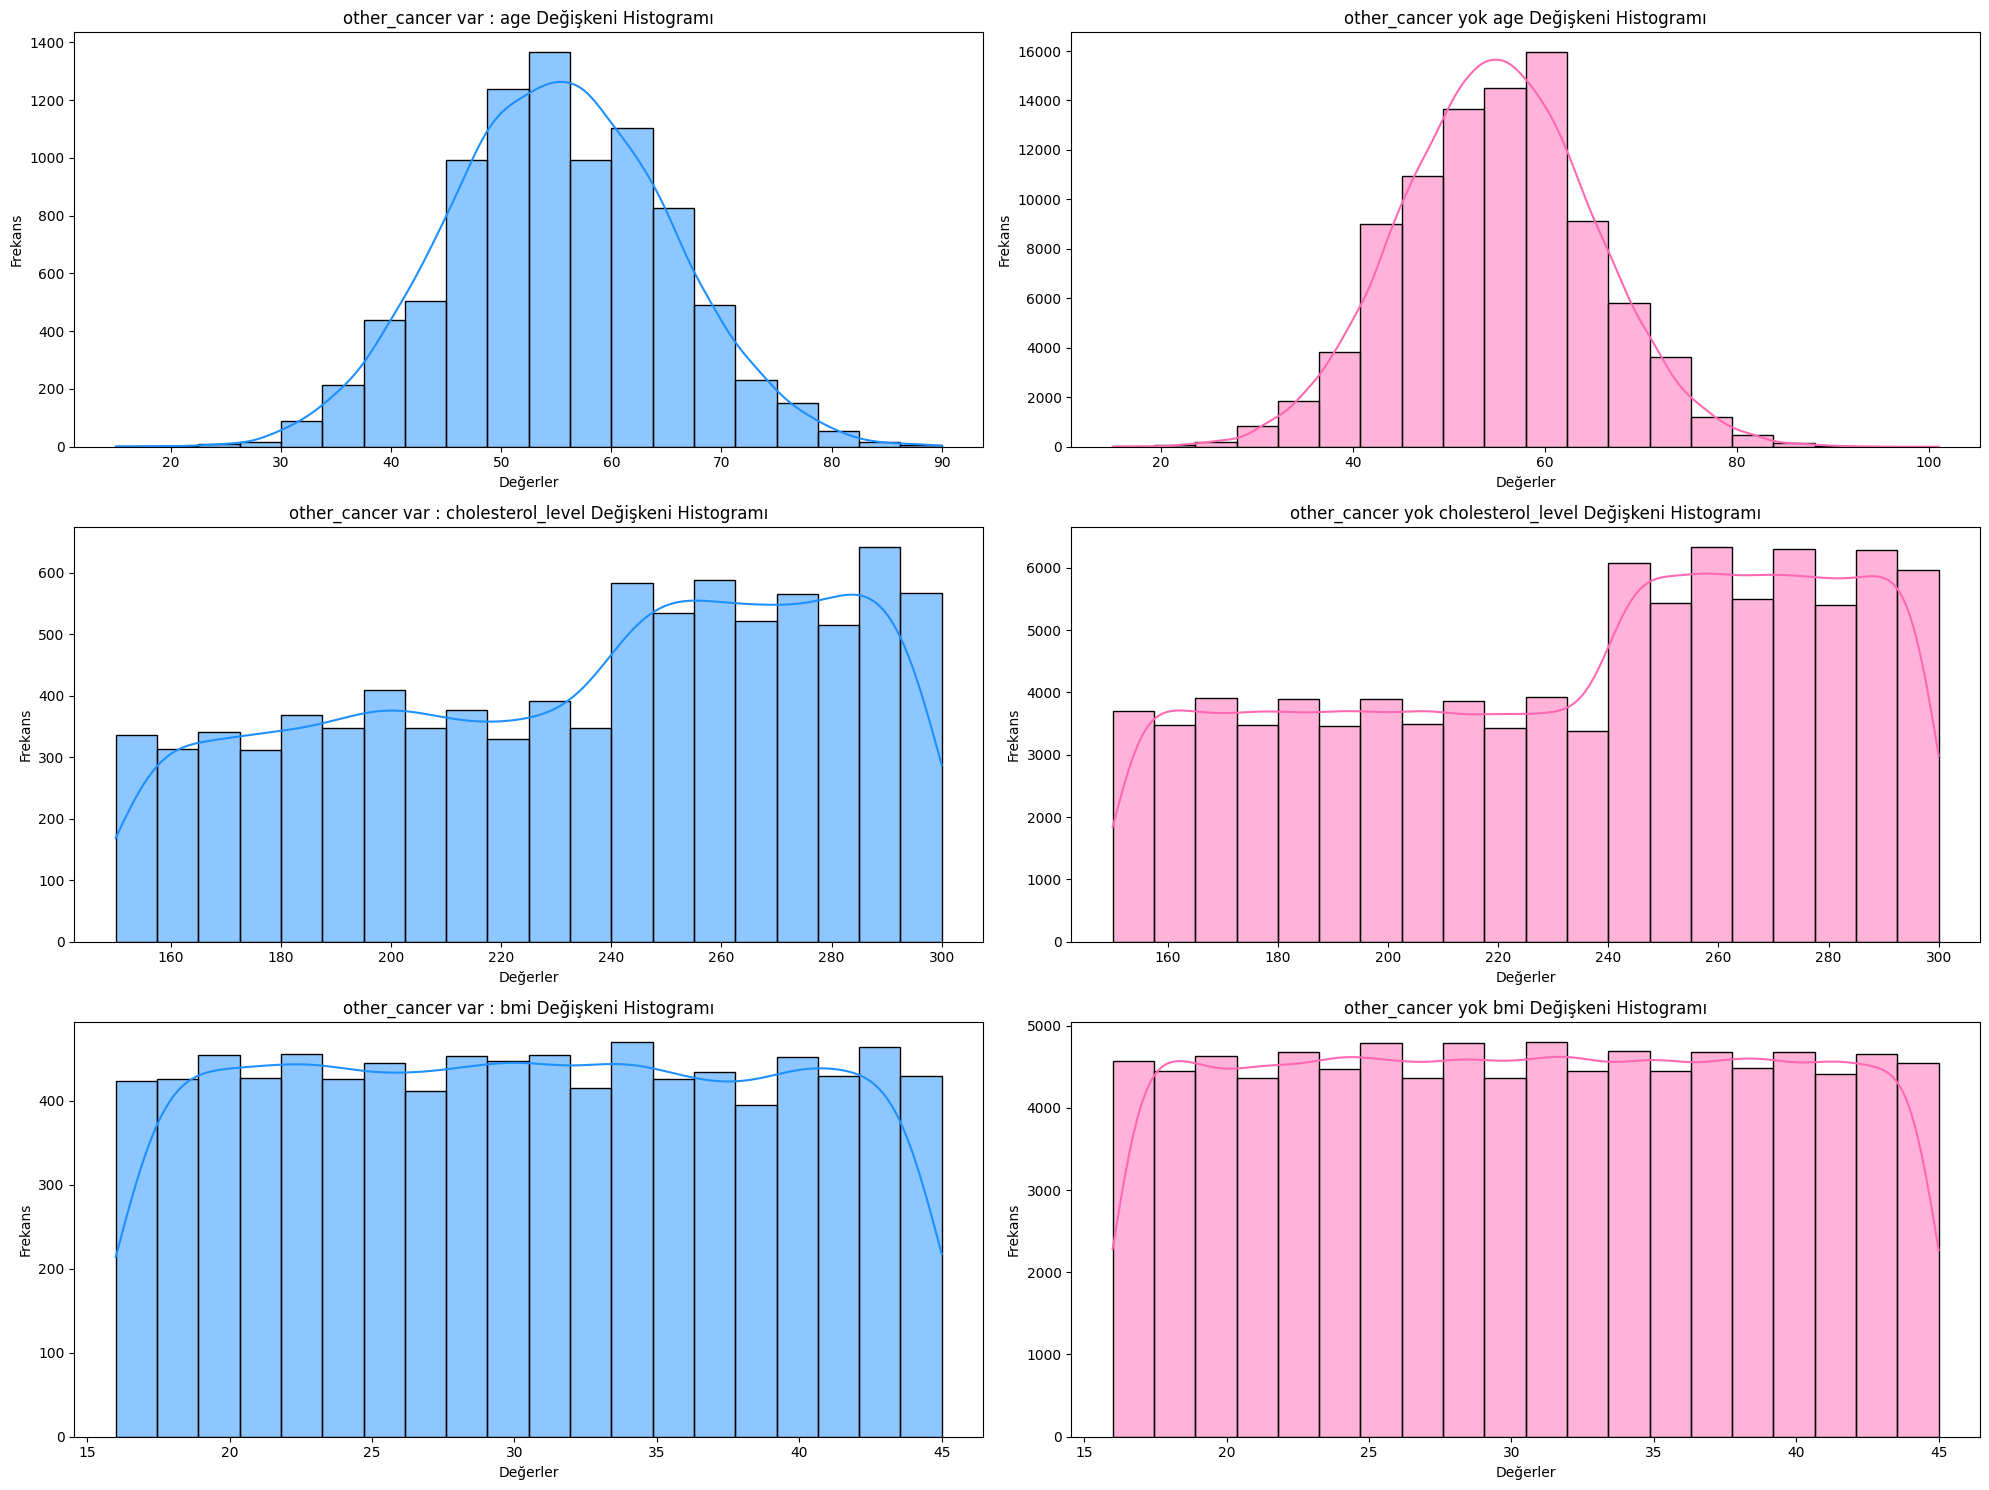

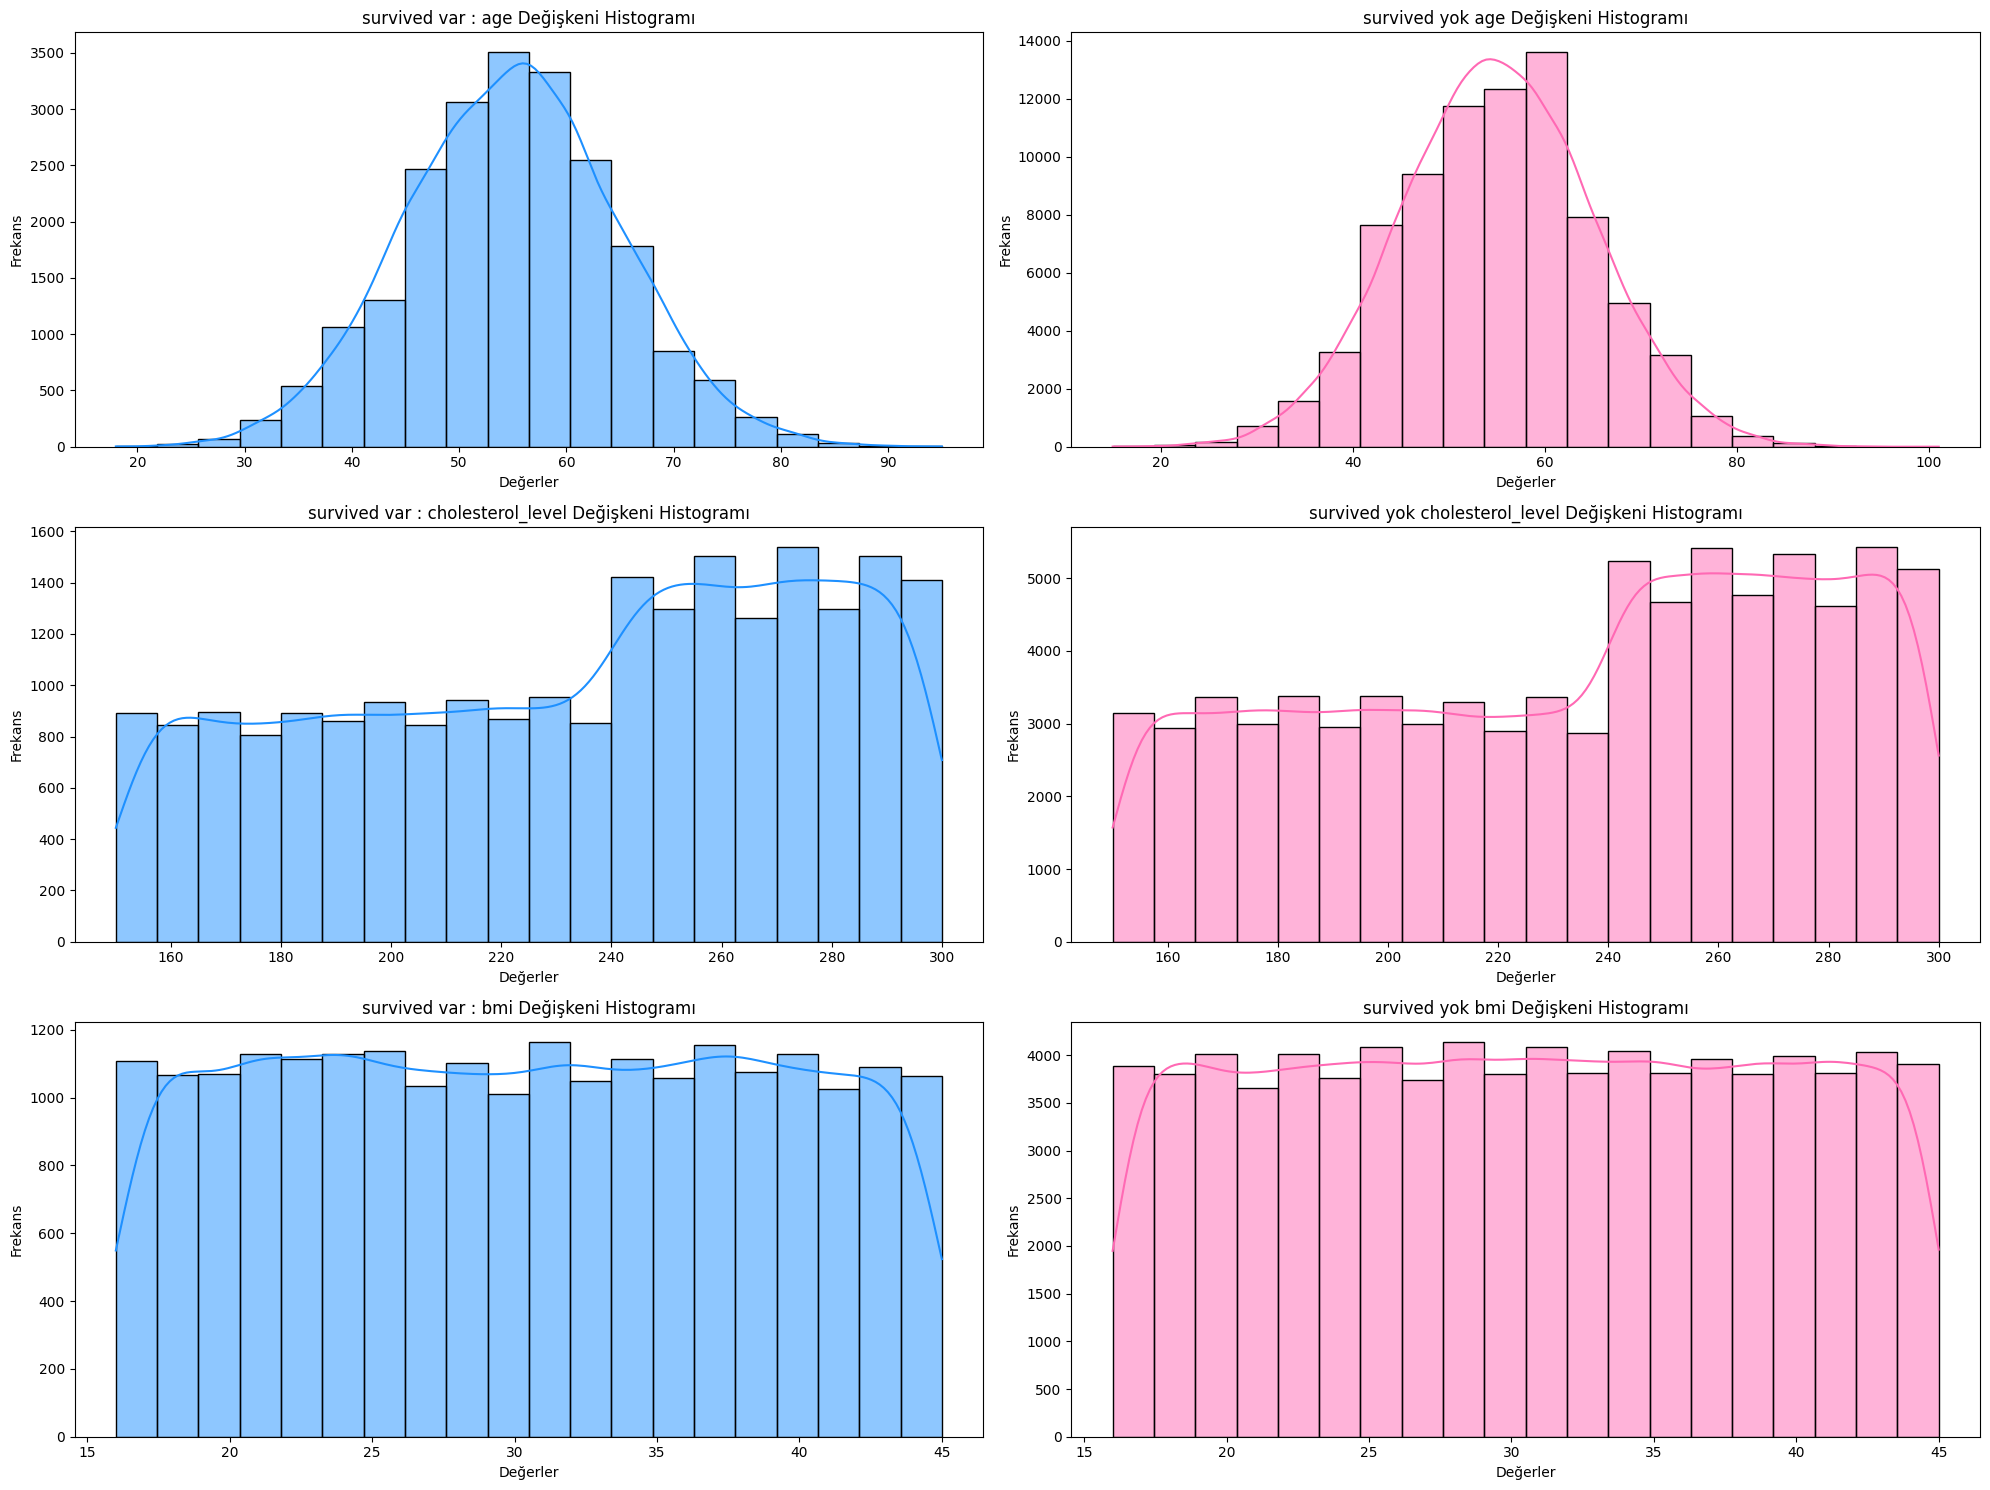

In [16]:

columns = ["hypertension","asthma", "cirrhosis", "other_cancer", "survived"]

for column in columns:
# Değişkenler
    degiskenler = ["age", "cholesterol_level", "bmi"]

    # Verileri cinsiyete göre ayırma
    columnA = data[data[column] == 1]
    columnB = data[data[column] == 0]

    fig, axes = plt.subplots(len(degiskenler), 2, figsize=(20, 5 * len(degiskenler)))

    # Her bir değişken için histogramların çizimi
    for i, degisken in enumerate(degiskenler):
        sns.histplot(columnA[degisken], bins=20, color='#1e90ff', kde=True, ax=axes[i, 0])
        axes[i, 0].set_title(f"{column} var : {degisken} Değişkeni Histogramı")

        axes[i, 0].set_xlabel("Değerler")
        axes[i, 0].set_ylabel("Frekans")

        sns.histplot(columnB[degisken], bins=20, color='#ff69b4', kde=True, ax=axes[i, 1])
        axes[i, 1].set_title(f"{column} yok {degisken} Değişkeni Histogramı")
        axes[i, 1].set_xlabel("Değerler")
        axes[i, 1].set_ylabel("Frekans")

    plt.tight_layout()
    plt.show()

10.3 Bu kodun amacı, veri setindeki belirli değişkenlerin (yaş, kolesterol seviyesi, BMI) cinsiyete göre normal dağılıma uygunluğunu kontrol etmek için Kolmogorov-Smirnov testini kullanır.

İlk olarak, KS testini uygulayacağınız değişkenlerin listesi degiskenler olarak belirlenir.
Veriler cinsiyete göre ayrılır: erkekler ve kadınlar.
Her bir cinsiyet için belirlenen değişkenler üzerinde Kolmogorov-Smirnov testi yapılır.
Test sonuçları incelenir ve her değişken için normal dağılıma uygunluk durumu belirtilir.

In [17]:
# Kolmogorov-Smirnov testini uygulayacağımız verileri seçtiğimiz liste
degiskenler = ["age", "cholesterol_level" ,"bmi"]
normallik_testleri = {}

# Verileri cinsiyete göre ayıralım
erkekler = data[data['gender'] == 'Male']
kadinlar = data[data['gender'] == 'Female']

# Erkekler için Kolmogorov-Smirnov testi
print("Erkekler:")
print("-----------------------------------------------------------------------------------------")
for degisken in degiskenler:
    ks_test = stats.kstest(erkekler[degisken], 'norm', args=(np.mean(erkekler[degisken]), np.std(erkekler[degisken])))
    normallik_testleri[f'Erkekler_{degisken}'] = {'Kolmogorov-Smirnov': ks_test}
    if ks_test.pvalue > 0.05:
        print(f"{degisken}: Normal dağılıma uygundur (p-value = {ks_test.pvalue})")
    else:
        print(f"{degisken}: Normal dağılıma uymaz (p-value = {ks_test.pvalue})")

# Kadınlar için Kolmogorov-Smirnov testi
print("\nKadınlar:")
print("-----------------------------------------------------------------------------------------")
for degisken in degiskenler:
    ks_test = stats.kstest(kadinlar[degisken], 'norm', args=(np.mean(kadinlar[degisken]), np.std(kadinlar[degisken])))
    normallik_testleri[f'Kadinlar_{degisken}'] = {'Kolmogorov-Smirnov': ks_test}
    if ks_test.pvalue > 0.05:
        print(f"{degisken}: Normal dağılıma uygundur (p-value = {ks_test.pvalue})")
    else:
        print(f"{degisken}: Normal dağılıma uymaz (p-value = {ks_test.pvalue})")

Erkekler:
-----------------------------------------------------------------------------------------
age: Normal dağılıma uymaz (p-value = 4.140512290933633e-24)
cholesterol_level: Normal dağılıma uymaz (p-value = 4.659133066004392e-286)
bmi: Normal dağılıma uymaz (p-value = 5.907110249386319e-150)

Kadınlar:
-----------------------------------------------------------------------------------------
age: Normal dağılıma uymaz (p-value = 2.9156476792243383e-21)
cholesterol_level: Normal dağılıma uymaz (p-value = 1.478787108272669e-286)
bmi: Normal dağılıma uymaz (p-value = 4.5217421018995287e-156)



10.4 Bu kod, veri setindeki belirli değişkenlerin (yaş, kolesterol seviyesi, BMI) cinsiyete göre normal dağılıma uygunluğunu kontrol etmek için Kolmogorov-Smirnov testini kullanır.

İlk adımda, incelenecek değişkenler belirlenir.
Veriler, cinsiyete göre ayrılır: erkekler ve kadınlar.
Her bir cinsiyet için belirlenen değişkenler üzerinde Kolmogorov-Smirnov testi yapılır.
Sonuçlar incelenir ve her değişken için normal dağılıma uygunluk durumu belirtilir.
Bu test, her bir değişkenin normal dağılıma uygun olup olmadığını belirlemek için kullanılır.

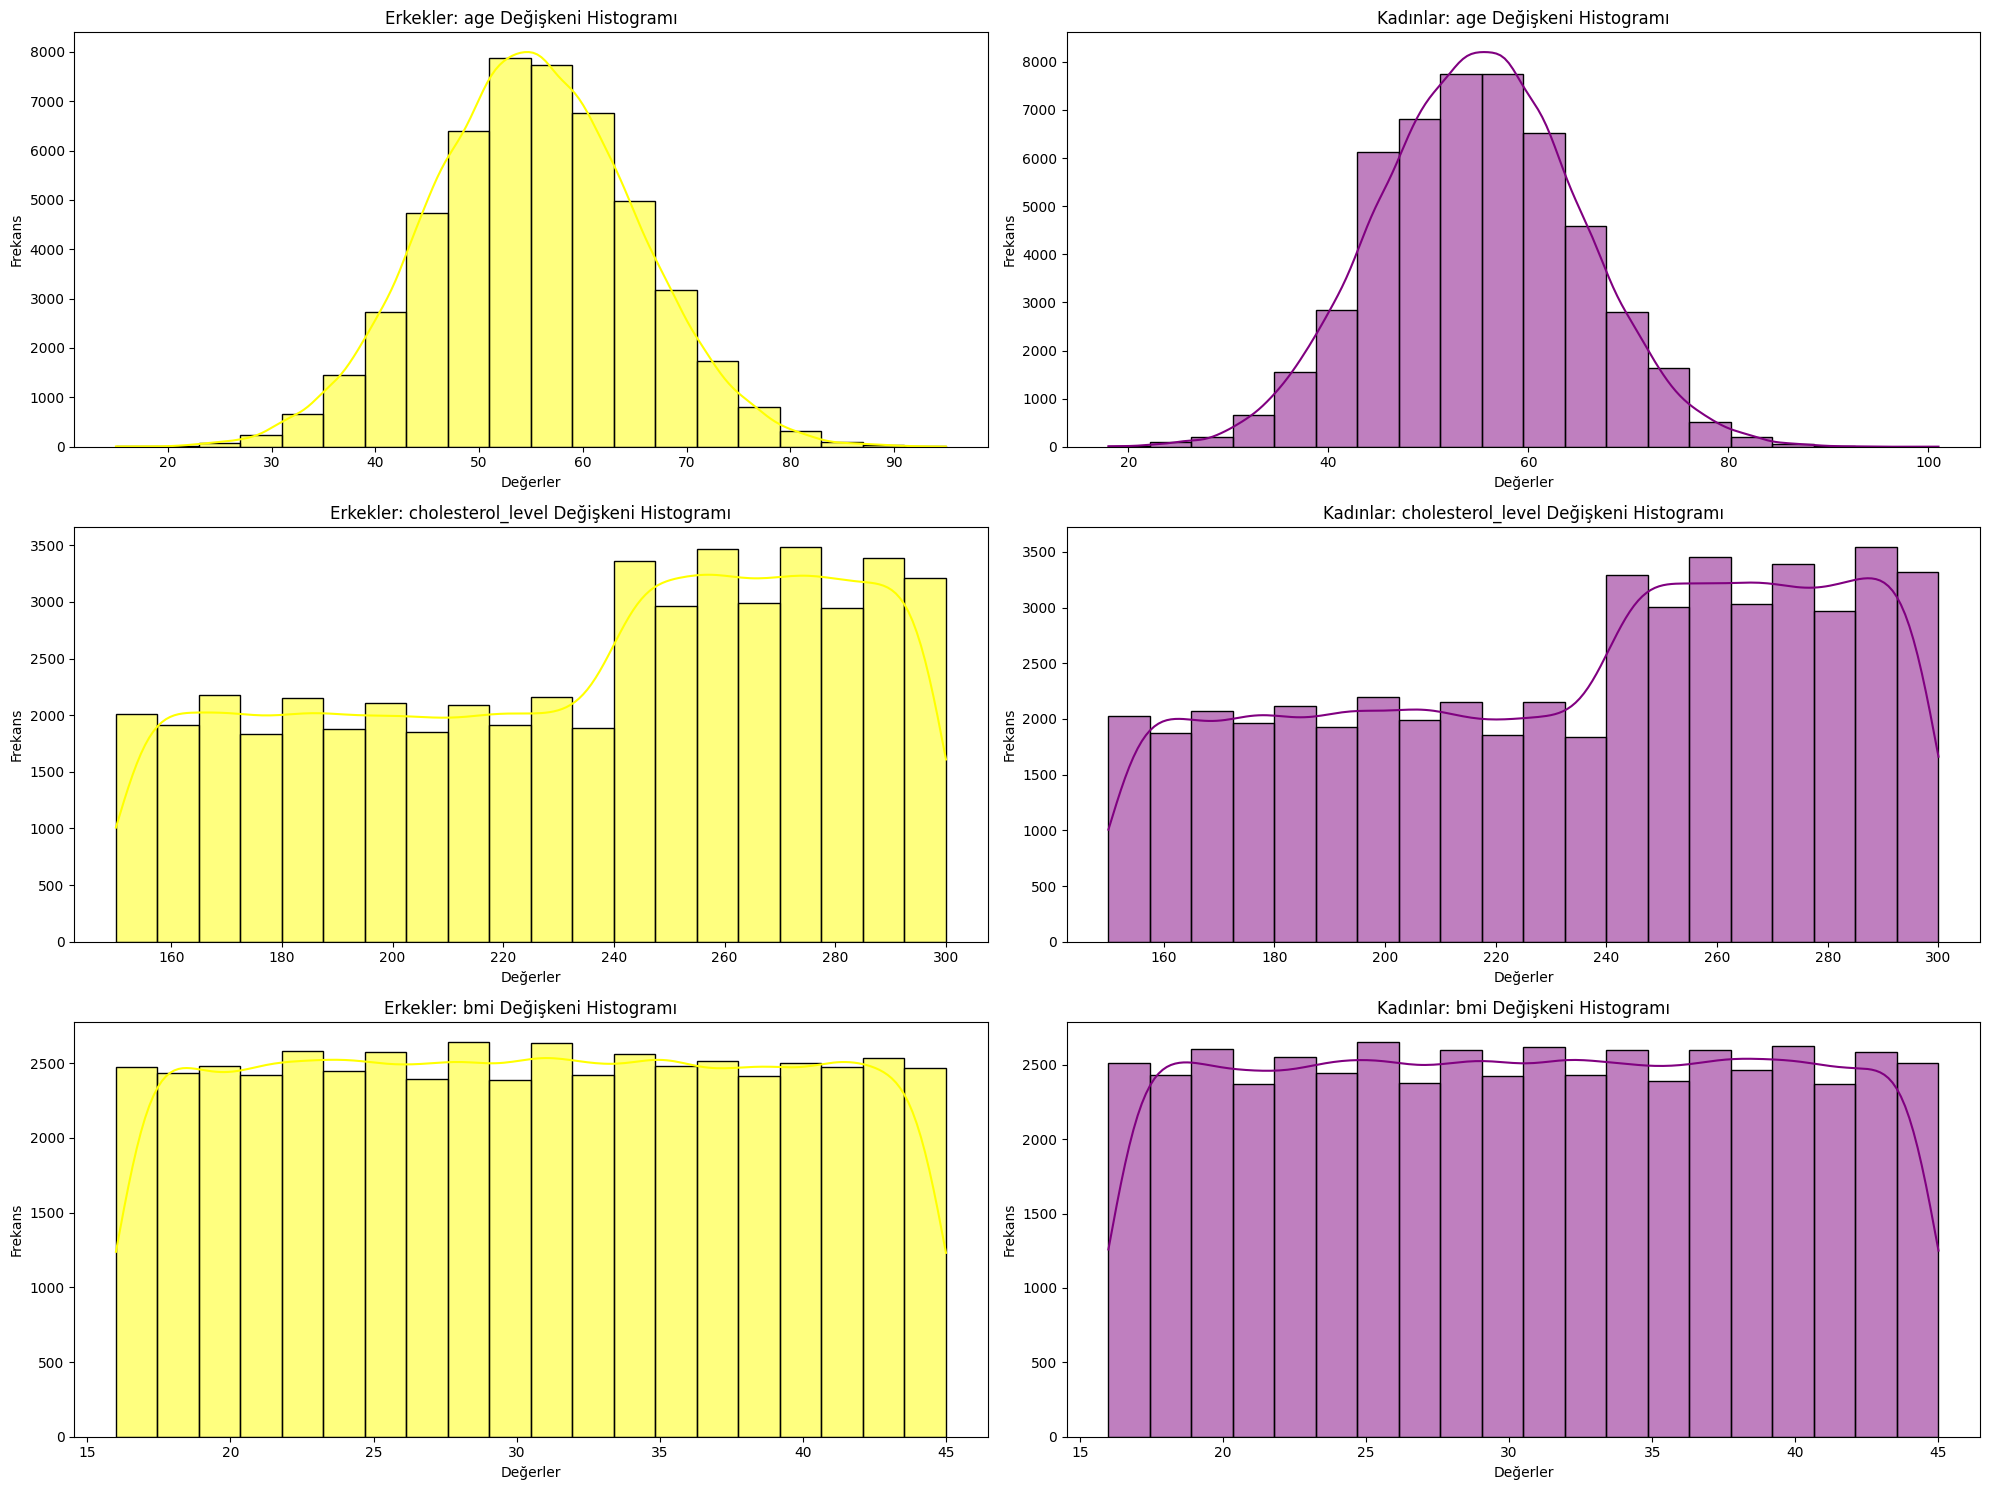

In [43]:

# Değişkenler
degiskenler = ["age", "cholesterol_level", "bmi"]

# Verileri cinsiyete göre ayırma
erkekler = data[data['gender'] == 'Male']
kadinlar = data[data['gender'] == 'Female']

fig, axes = plt.subplots(len(degiskenler), 2, figsize=(20, 5 * len(degiskenler)))

# Her bir değişken için histogramların çizimi
for i, degisken in enumerate(degiskenler):
    # Erkekler
    sns.histplot(erkekler[degisken], bins=20, color='yellow', kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f"Erkekler: {degisken} Değişkeni Histogramı")
    axes[i, 0].set_xlabel("Değerler")
    axes[i, 0].set_ylabel("Frekans")

    # Kadınlar
    sns.histplot(kadinlar[degisken], bins=20, color='purple', kde=True, ax=axes[i, 1])
    axes[i, 1].set_title(f"Kadınlar: {degisken} Değişkeni Histogramı")
    axes[i, 1].set_xlabel("Değerler")
    axes[i, 1].set_ylabel("Frekans")

plt.tight_layout()
plt.show()


10.5 Erkekler için kolesterol seviyelerine göre normal, sınırda yüksek ve yüksek kolestrol gruplarını ayrı ayrı filtreleyerek Kolmogorov-Smirnov testini yapar.

In [19]:
#Erkekler için normal, sınırda yüksek  ve yüksek kolestrol seviyelerini ayrı ayrı filtreleyereke testimizi yapalım.

degiskenler = ["age", "cholesterol_level","bmi"]
normallik_testleri = {}

# Verileri cinsiyete göre ayıralım
erkekler = data[data['gender'] == 'Male']

cholesterol_level = {
    'Normal': (0,200 ),
    'Sınırda_yüksek': (200, 240),
    'Yüksek': (240, np.inf)
  
}

print("\nErkeklerin kolestrol seviyelerine göre yapılan testler:")
for group_name, (total_min, total_max) in cholesterol_level.items():
    cholesterol_level = erkekler[(erkekler['cholesterol_level'] >= total_min) & (erkekler['cholesterol_level'] < total_max)]
    print(f"\nKolestrol Seviyesi: {group_name}")
    for degisken in degiskenler:
        ks_test = stats.kstest(cholesterol_level[degisken], 'norm', args=(np.mean(cholesterol_level[degisken]), np.std(cholesterol_level[degisken])))
        normallik_testleri[f'Erkekler_{group_name}_{degisken}'] = {'Kolmogorov-Smirnov': ks_test}
        if ks_test.pvalue > 0.05:
            print(f"{degisken}: Normal dağılıma uygundur (p-value = {ks_test.pvalue})")
        else:
            print(f"{degisken}: Normal dağılıma uymaz (p-value = {ks_test.pvalue})")


Erkeklerin kolestrol seviyelerine göre yapılan testler:

Kolestrol Seviyesi: Normal
age: Normal dağılıma uymaz (p-value = 5.683741487666462e-07)
cholesterol_level: Normal dağılıma uymaz (p-value = 3.026021640947003e-54)
bmi: Normal dağılıma uymaz (p-value = 1.9516074158877902e-46)

Kolestrol Seviyesi: Sınırda_yüksek
age: Normal dağılıma uymaz (p-value = 2.503194162530114e-07)
cholesterol_level: Normal dağılıma uymaz (p-value = 7.34914727295841e-48)
bmi: Normal dağılıma uymaz (p-value = 2.0320113289808594e-34)

Kolestrol Seviyesi: Yüksek
age: Normal dağılıma uymaz (p-value = 8.493622496885339e-12)
cholesterol_level: Normal dağılıma uymaz (p-value = 4.231791055716357e-95)
bmi: Normal dağılıma uymaz (p-value = 2.9145817117565947e-81)



10.6 Erkekler için kolesterol seviyelerine göre normal, sınırda yüksek ve yüksek kolestrol gruplarını ayrı ayrı filtreleyerek Kolmogorov-Smirnov testinin görselleştirilmesini sağlar


Erkeklerin kolestrol seviyelerine göre yapılan testler:

Kolestrol Seviyesi: Normal
age: Normal dağılıma uymaz (p-value = 5.683741487666462e-07)
cholesterol_level: Normal dağılıma uymaz (p-value = 3.026021640947003e-54)
bmi: Normal dağılıma uymaz (p-value = 1.9516074158877902e-46)


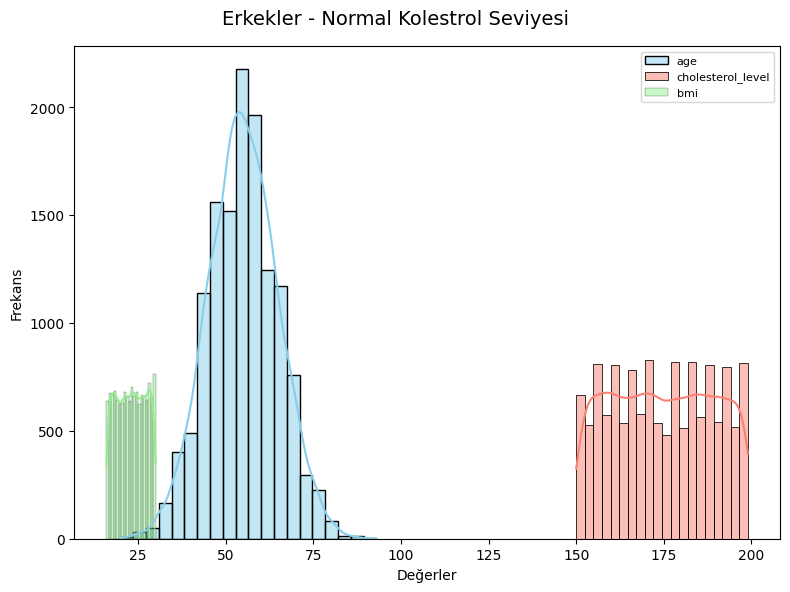


Kolestrol Seviyesi: Sınırda_yüksek
age: Normal dağılıma uymaz (p-value = 2.503194162530114e-07)
cholesterol_level: Normal dağılıma uymaz (p-value = 7.34914727295841e-48)
bmi: Normal dağılıma uymaz (p-value = 2.0320113289808594e-34)


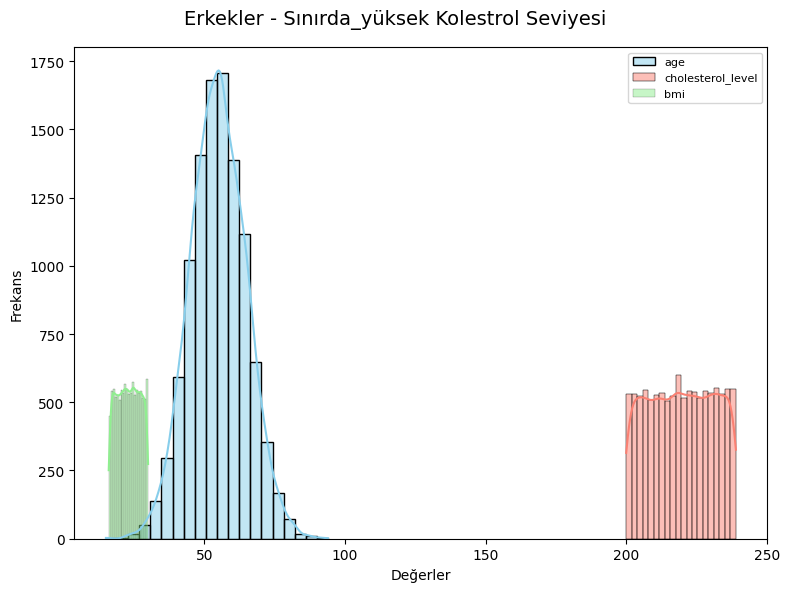


Kolestrol Seviyesi: Yüksek
age: Normal dağılıma uymaz (p-value = 8.493622496885339e-12)
cholesterol_level: Normal dağılıma uymaz (p-value = 4.231791055716357e-95)
bmi: Normal dağılıma uymaz (p-value = 2.9145817117565947e-81)


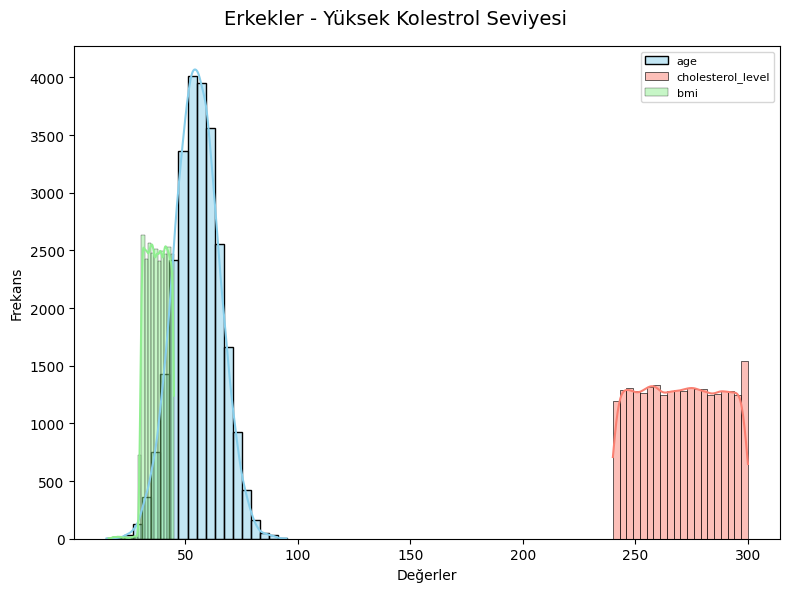

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# Veri setini yükleme 
data = pd.read_csv('lung-cancer.csv')

# Değişkenler
degiskenler = ["age", "cholesterol_level", "bmi"]

# Normallik testlerinin sonuçlarını saklamak için boş bir sözlük
normallik_testleri = {}

# Verileri cinsiyete göre ayıralım (örneğin, erkekler için)
erkekler = data[data['gender'] == 'Male']

# Kolesterol seviyeleri
cholesterol_levels = {
    'Normal': (0, 200),
    'Sınırda_yüksek': (200, 240),
    'Yüksek': (240, np.inf)
}

print("\nErkeklerin kolestrol seviyelerine göre yapılan testler:")
for group_name, (total_min, total_max) in cholesterol_levels.items():
    group_data = erkekler[(erkekler['cholesterol_level'] >= total_min) & (erkekler['cholesterol_level'] < total_max)]
    print(f"\nKolestrol Seviyesi: {group_name}")
    for i, degisken in enumerate(degiskenler):
        ks_test = stats.kstest(group_data[degisken], 'norm', args=(np.mean(group_data[degisken]), np.std(group_data[degisken])))
        normallik_testleri[f'Erkekler_{group_name}_{degisken}'] = {'Kolmogorov-Smirnov': ks_test}
        if ks_test.pvalue > 0.05:
            print(f"{degisken}: Normal dağılıma uygundur (p-value = {ks_test.pvalue})")
        else:
            print(f"{degisken}: Normal dağılıma uymaz (p-value = {ks_test.pvalue})")

    # Histogramları çizmek için tek bir subplot oluşturalım
    fig, ax = plt.subplots(1, 1, figsize=(8, 6))
    fig.suptitle(f"Erkekler - {group_name} Kolestrol Seviyesi", fontsize=14)

    # Her bir değişken için histogramları çizelim
    color_palette = ['skyblue', 'salmon', 'lightgreen']  # Renk paleti
    for i, degisken in enumerate(degiskenler):
        sns.histplot(group_data[degisken], bins=20, kde=True, color=color_palette[i], label=degisken, ax=ax)
    
    ax.set_xlabel("Değerler", fontsize=10)
    ax.set_ylabel("Frekans", fontsize=10)
    ax.legend(fontsize=8)  # Değişken etiketleri için küçük bir legende sahip olunur

    plt.tight_layout()
    plt.show()


10.7 Kadınlar için kolesterol seviyelerine göre normal, sınırda yüksek ve yüksek kolestrol gruplarını ayrı ayrı filtreleyerek Kolmogorov-Smirnov testini yapar.

In [21]:
#Kadınlar için normal, sınırda yüksek  ve yüksek kolestrol seviyelerini ayrı ayrı filtreleyereke testimizi yapalım.

degiskenler = ["age", "cholesterol_level","bmi"]
normallik_testleri = {}

# Verileri cinsiyete göre ayıralım
kadinlar = data[data['gender'] == 'Female']


cholesterol_level = {
    'Normal': (0,200 ),
    'Sınırda_yüksek': (200, 240),
    'Yüksek': (240, np.inf)
  
}

print("\nKadınların kolestrol seviyelerine göre yapılan testler:")
for group_name, (total_min, total_max) in cholesterol_level.items():
    group_data = kadinlar[(kadinlar['cholesterol_level'] >= total_min) & (kadinlar['cholesterol_level'] < total_max)]
    print(f"\nKolestrol Seviyesi: {group_name}")
    for degisken in degiskenler:
        ks_test = stats.kstest(group_data[degisken], 'norm', args=(np.mean(group_data[degisken]), np.std(group_data[degisken])))
        normallik_testleri[f'Kadınlar_{group_name}_{degisken}'] = {'Kolmogorov-Smirnov': ks_test}
        if ks_test.pvalue > 0.05:
            print(f"{degisken}: Normal dağılıma uygundur (p-value = {ks_test.pvalue})")
        else:
            print(f"{degisken}: Normal dağılıma uymaz (p-value = {ks_test.pvalue})")



Kadınların kolestrol seviyelerine göre yapılan testler:

Kolestrol Seviyesi: Normal
age: Normal dağılıma uymaz (p-value = 2.2369773087119188e-07)
cholesterol_level: Normal dağılıma uymaz (p-value = 8.358884028527105e-56)
bmi: Normal dağılıma uymaz (p-value = 8.364599798197917e-48)

Kolestrol Seviyesi: Sınırda_yüksek
age: Normal dağılıma uymaz (p-value = 9.205314205930924e-06)
cholesterol_level: Normal dağılıma uymaz (p-value = 1.82401003491283e-55)
bmi: Normal dağılıma uymaz (p-value = 3.0551587448620506e-38)

Kolestrol Seviyesi: Yüksek
age: Normal dağılıma uymaz (p-value = 7.285166964973698e-12)
cholesterol_level: Normal dağılıma uymaz (p-value = 1.9231022294728605e-107)
bmi: Normal dağılıma uymaz (p-value = 4.6515692530017956e-74)


10.8 Kadınlar için kolesterol seviyelerine göre normal, sınırda yüksek ve yüksek kolestrol gruplarını ayrı ayrı filtreleyerek Kolmogorov-Smirnov testinin görselleştirilmesini sağlar


Kadınların kolestrol seviyelerine göre yapılan testler:

Kolestrol Seviyesi: Normal
age: Normal dağılıma uymaz (p-value = 2.2369773087119188e-07)
cholesterol_level: Normal dağılıma uymaz (p-value = 8.358884028527105e-56)
bmi: Normal dağılıma uymaz (p-value = 8.364599798197917e-48)


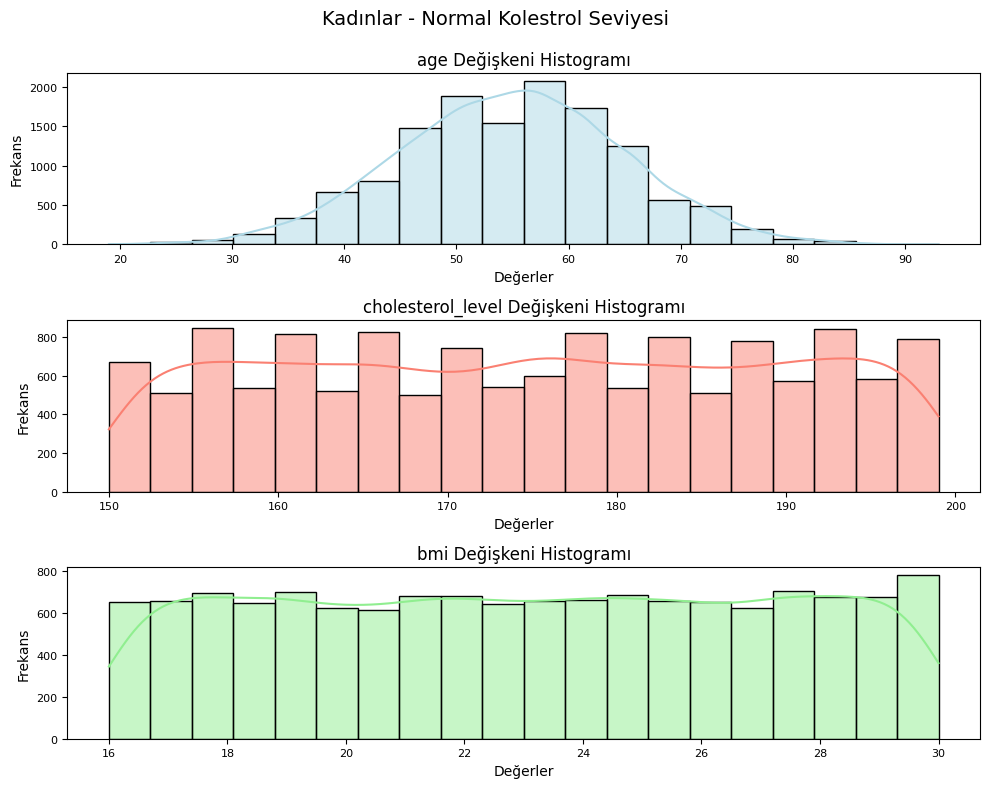


Kolestrol Seviyesi: Sınırda_yüksek
age: Normal dağılıma uymaz (p-value = 9.205314205930924e-06)
cholesterol_level: Normal dağılıma uymaz (p-value = 1.82401003491283e-55)
bmi: Normal dağılıma uymaz (p-value = 3.0551587448620506e-38)


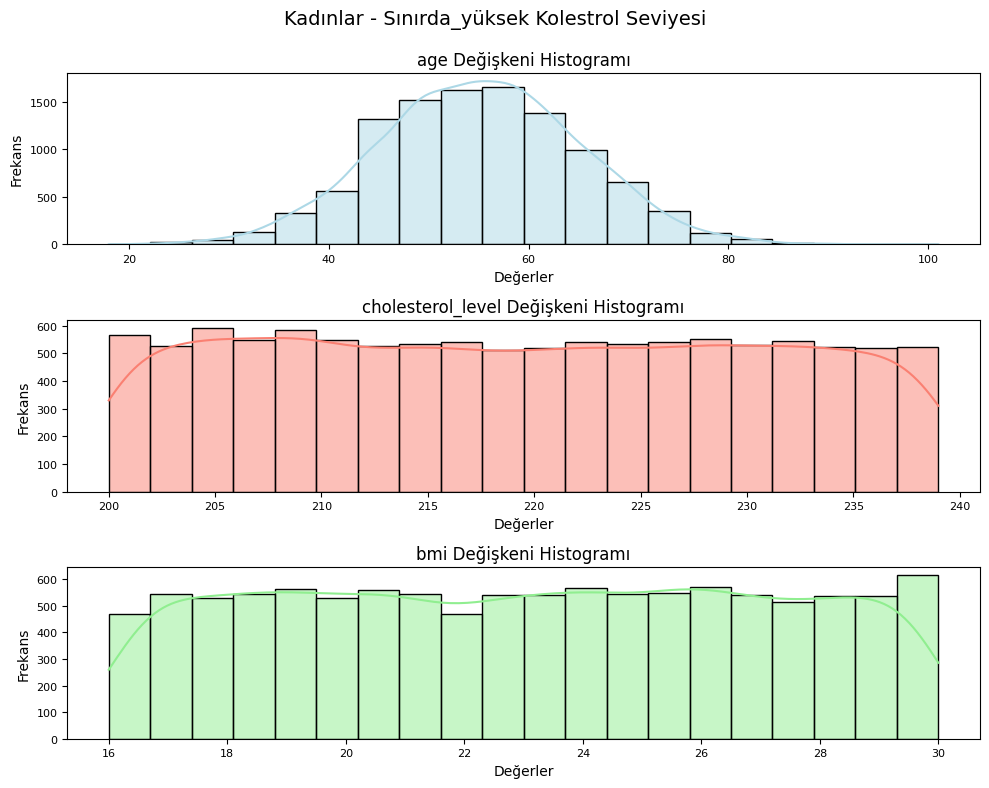


Kolestrol Seviyesi: Yüksek
age: Normal dağılıma uymaz (p-value = 7.285166964973698e-12)
cholesterol_level: Normal dağılıma uymaz (p-value = 1.9231022294728605e-107)
bmi: Normal dağılıma uymaz (p-value = 4.6515692530017956e-74)


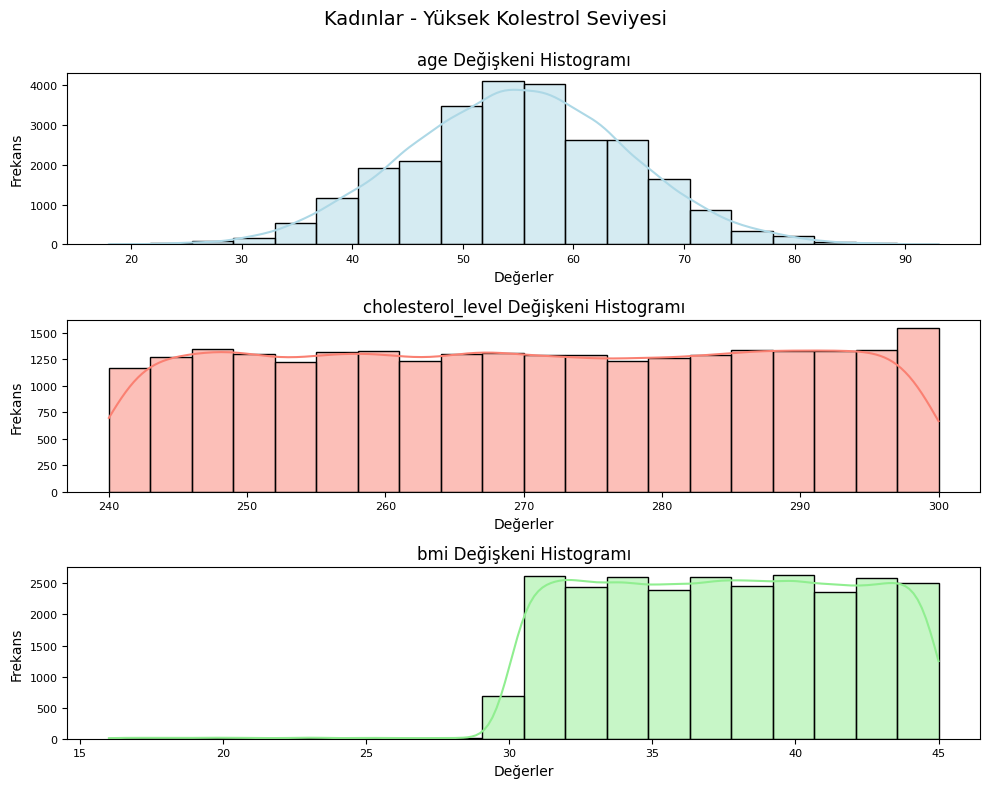

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# Veri setini yükleme 
data = pd.read_csv('lung-cancer.csv')

# Değişkenler
degiskenler = ["age", "cholesterol_level", "bmi"]

# Normallik testlerinin sonuçlarını saklamak için boş bir sözlük
normallik_testleri = {}

# Verileri cinsiyete göre ayıralım (örneğin, kadınlar için)
kadinlar = data[data['gender'] == 'Female']

# Kolesterol seviyeleri
cholesterol_levels = {
    'Normal': (0, 200),
    'Sınırda_yüksek': (200, 240),
    'Yüksek': (240, np.inf)
}

print("\nKadınların kolestrol seviyelerine göre yapılan testler:")
for group_name, (total_min, total_max) in cholesterol_levels.items():
    group_data = kadinlar[(kadinlar['cholesterol_level'] >= total_min) & (kadinlar['cholesterol_level'] < total_max)]
    print(f"\nKolestrol Seviyesi: {group_name}")
    for degisken in degiskenler:
        ks_test = stats.kstest(group_data[degisken], 'norm', args=(np.mean(group_data[degisken]), np.std(group_data[degisken])))
        normallik_testleri[f'Kadınlar_{group_name}_{degisken}'] = {'Kolmogorov-Smirnov': ks_test}
        if ks_test.pvalue > 0.05:
            print(f"{degisken}: Normal dağılıma uygundur (p-value = {ks_test.pvalue})")
        else:
            print(f"{degisken}: Normal dağılıma uymaz (p-value = {ks_test.pvalue})")

    # Histogramları çizmek için tek bir subplot oluşturalım
    fig, axes = plt.subplots(len(degiskenler), figsize=(10, 8))
    fig.suptitle(f"Kadınlar - {group_name} Kolestrol Seviyesi", fontsize=14)

    # Her bir değişken için histogramları çizelim
    color_palette = ['lightblue', 'salmon', 'lightgreen']  # Renk paleti
    for i, degisken in enumerate(degiskenler):
        sns.histplot(group_data[degisken], bins=20, kde=True, color=color_palette[i], ax=axes[i])
        axes[i].set_title(f"{degisken} Değişkeni Histogramı", fontsize=12)
        axes[i].set_xlabel("Değerler", fontsize=10)
        axes[i].set_ylabel("Frekans", fontsize=10)
        axes[i].tick_params(axis='both', which='major', labelsize=8)  # Eksen etiketlerinin boyutu
        axes[i].tick_params(axis='both', which='minor', labelsize=6)  # Yardımcı eksen etiketlerinin boyutu

    plt.tight_layout()
    plt.subplots_adjust(top=0.9)  # Başlık ile subplot arasındaki mesafe
    plt.show()



10.9 Veri setindeki yaş ve BMI değerlerini belirli aralıklara bölerek kategorik gruplar oluşturur ve her bir cinsiyet için ayrı ayrı Chi-Kare testi uygular

Female Chi-Kare İstatistiği: 16.072071915369055
Female P-değeri: 0.7121430789663239


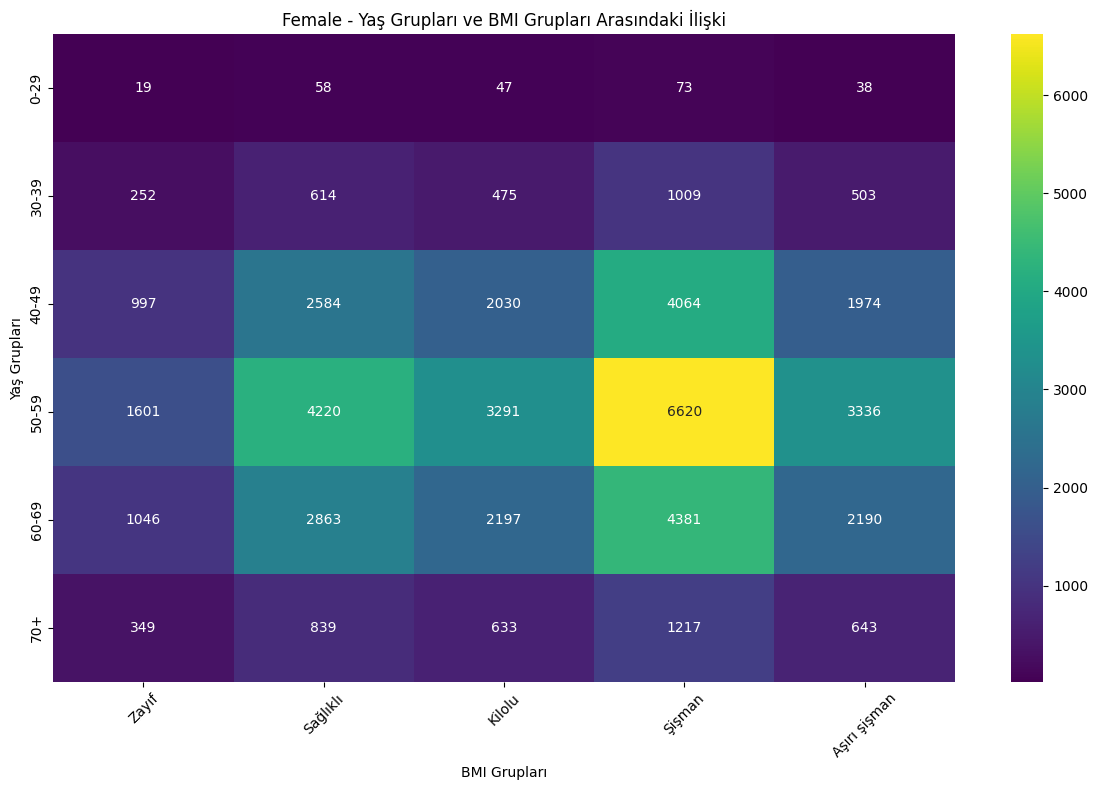

Male Chi-Kare İstatistiği: 17.79553474414
Male P-değeri: 0.6008753481880871


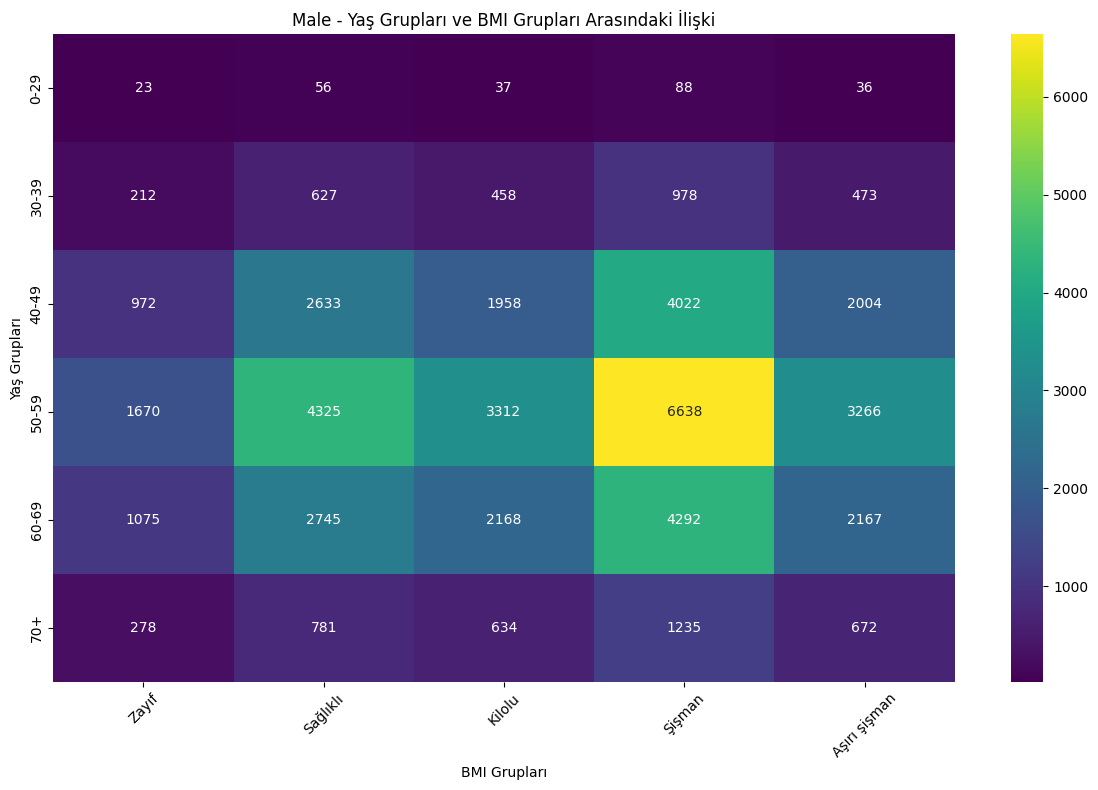

In [23]:

from scipy.stats import chi2_contingency

# Veri setini yükle
data = pd.read_csv("lung-cancer.csv")

# Yaş ve BMI gruplarını tanımla
age_bins = [0, 30, 40, 50, 60, 70, 100]
age_labels = ['0-29', '30-39', '40-49', '50-59', '60-69', '70+']
bmi_bins = [10, 18.5, 25, 30, 40, 60]
bmi_labels = ['Zayıf', 'Sağlıklı', 'Kilolu', 'Şişman', 'Aşırı şişman']

# Yaş ve BMI gruplarını oluştur
data['age_group'] = pd.cut(data['age'], bins=age_bins, labels=age_labels, right=False)
data['bmi_group'] = pd.cut(data['bmi'], bins=bmi_bins, labels=bmi_labels, right=False)

# Kadınlar ve Erkekler için ayrı ayrı Chi-Kare testi yapalım
genders = ['Female', 'Male']
results = {}

for gender in genders:
    gender_data = data[data['gender'] == gender]
    contingency_table = pd.crosstab(gender_data['age_group'], gender_data['bmi_group'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    results[gender] = {'chi2': chi2, 'p': p, 'contingency_table': contingency_table}

    # Chi-Kare testi sonuçları
    print(f"{gender} Chi-Kare İstatistiği: {chi2}")
    print(f"{gender} P-değeri: {p}")

    # Çapraz tabloyu görselleştir
    plt.figure(figsize=(12, 8))
    sns.heatmap(contingency_table, annot=True, cmap='viridis', cbar=True, fmt='d')
    plt.title(f'{gender} - Yaş Grupları ve BMI Grupları Arasındaki İlişki')
    plt.xlabel('BMI Grupları')
    plt.ylabel('Yaş Grupları')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


Female (Kadınlar) için P-değeri: 0.712
Yaş grupları ve BMI grupları arasında istatistiksel olarak anlamlı bir ilişki bulunmamaktadır (p > 0.05).

Male (Erkekler) için P-değeri: 0.601
Erkekler için de yaş grupları ve BMI grupları arasında istatistiksel olarak anlamlı bir ilişki bulunmamaktadır (p > 0.05).

Bu sonuçlar, yaş grupları ile BMI grupları arasında belirli bir cinsiyete özgü bir ilişkinin olmadığını gösterir. Yani, kadınlar ve erkekler için yaş grupları ile BMI grupları arasında belirli bir ilişki bulunmamaktadır. Bu çıkarım, Chi-Kare testinin yapılan gruplamalar için geçerli olup olmadığını değerlendirmemize yardımcı olur.

In [24]:
data = pd.read_csv("lung-cancer.csv", encoding='latin1')

10.10 Bu kod, hayatta kalanlar ve hayatta kalmayanlar arasında kolesterol seviyeleri açısından istatistiksel olarak anlamlı bir fark olup olmadığını test eder ve sonucu ekrana basar.
p-value, t-testinin hipotezleri test etme sonucunu gösterir. Eğer p-value belirli bir anlamlılık düzeyinden (genellikle 0.05) daha küçükse, null hipotez reddedilir ve iki grup arasında anlamlı bir fark olduğu sonucuna varılır.

In [25]:
# t-testi
stat, p_value = ttest_ind(data[data["survived"]==1]["cholesterol_level"], data[data["survived"]==0]["cholesterol_level"])

if p_value < 0.05:
    print(f"İki grup arasında istatistiksel olarak anlamlı bir fark bulunmaktadır (p-value = {p_value})")
else:
    print(f"İki grup arasında istatistiksel olarak anlamlı bir fark bulunmamaktadır (p-value = {p_value})")

İki grup arasında istatistiksel olarak anlamlı bir fark bulunmamaktadır (p-value = 0.8989779685697541)


11.Bu kod, kadınlar ve erkekler arasında "yüksek" kolestrol seviyesi grubundaki bireylerin kolesterol seviyeleri üzerinde varyans homojenliğini test eder.

İlk olarak, belirli bir eşik değere göre ("Yüksek" kolestrol seviyesi için 240 mg/dl) kadınlar ve erkekler veri setlerinden ilgili grupları filtreler.

Ardından, Levene testi uygulanır. Levene testi, iki veya daha fazla grup arasında varyansların homojen olup olmadığını belirlemek için kullanılır.

Test sonucu yazdırılır. Eğer p-value değeri belirli bir anlamlılık düzeyinden (genellikle 0.05) büyükse, yani null hipotez reddedilmezse, bu durumda "Yüksek" kolestrol seviyesi grubundaki kadınlar ve erkekler arasında kolesterol seviyeleri üzerinde varyans homojen olduğu sonucuna varılır. Aksi takdirde, varyanslar homojen değildir.

In [26]:
cholesterol_level = {
    'Normal': (0,200 ),
    'Sınırda_yüksek': (200, 240),
    'Yüksek': (240, np.inf)
  
}

sag = kadinlar[kadinlar['cholesterol_level'] >= 240]
olu = erkekler[erkekler['cholesterol_level'] >= 240]

# Levene testini uygulama
levene_test = stats.levene(sag['cholesterol_level'], olu['cholesterol_level'])

# Test sonucunu yazdırma
print("Levene Testi Sonucu:")
print(f"Statistic: {levene_test.statistic}")
print(f"P-value: {levene_test.pvalue}")

if levene_test.pvalue > 0.05:
    print("Yüksek - sag ve ölüler arasında cholesterol üzerinde varyans homojendir.")
else:
    print("Yüksek - sag ve ölüler arasında cholesterol üzerinde varyans homojen değildir.")

Levene Testi Sonucu:
Statistic: 0.9540287406868577
P-value: 0.32870048974924915
Yüksek - sag ve ölüler arasında cholesterol üzerinde varyans homojendir.



12.Bu kod, yaşlılar (50 yaş ve üzeri) ve gençler (25 yaş ve altı) grupları arasında belirli değişkenlerin (kolestrol seviyesi ve BMI) varyans homojenliğini test eder.

In [27]:
# Yaşlılar ve gençler için veri filtreleme
yasli_grup = data[data['age'] >= 50]
genc_grup = data[data['age'] <= 25]

degiskenler = ["cholesterol_level" ,"bmi"]


for degisken in degiskenler:
    # Levene testi uygulama
    levene_test = levene(yasli_grup[degisken], genc_grup[degisken])

    # Test sonucunu yazdırma
    if levene_test.pvalue > 0.05:
        print(f"{degisken}: Yaşlılar ve gençler arasında varyans homojendir (p-value = {levene_test.pvalue})")
    else:
        print(f"{degisken}: Yaşlılar ve gençler arasında varyans homojen değildir (p-value = {levene_test.pvalue})")

cholesterol_level: Yaşlılar ve gençler arasında varyans homojendir (p-value = 0.24392580875739472)
bmi: Yaşlılar ve gençler arasında varyans homojendir (p-value = 0.2029370750847536)


13.Bu kod, 'cholesterol_level' ve 'bmi' değişkenlerinin yaşa göre değişimini gösterir.

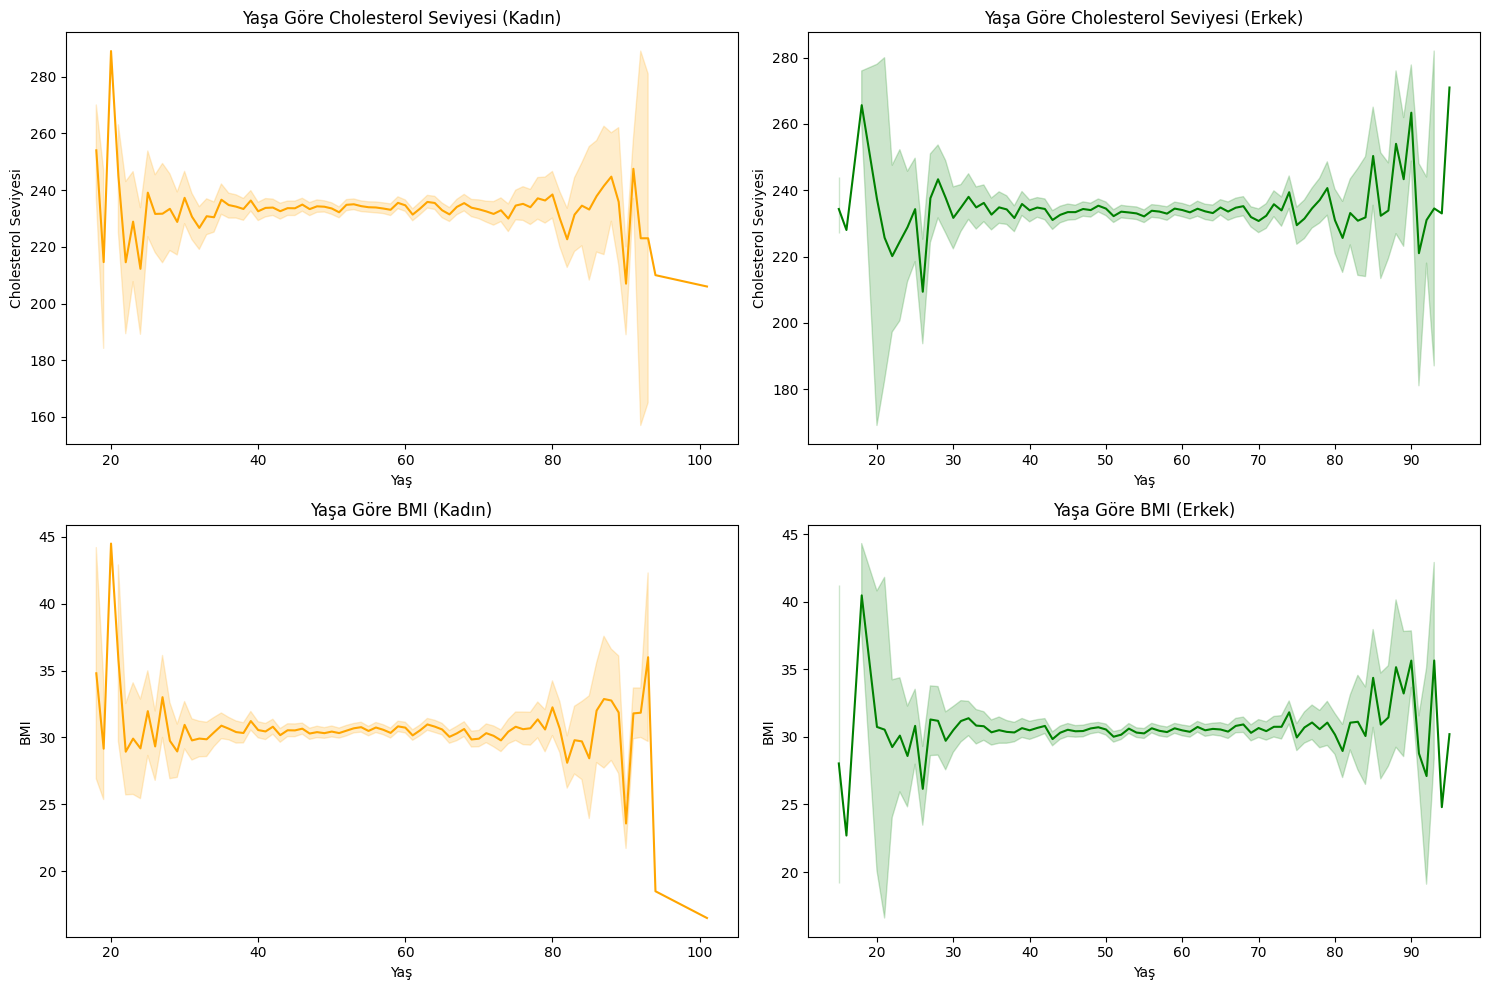

In [28]:
# Kadın ve erkek verilerini ayırma
data_female = data[data['gender'] == 'Female']
data_male = data[data['gender'] == 'Male']

# Plot ayarları
lifts = ["cholesterol_level", "bmi"]
titles = ['Cholesterol Seviyesi', 'BMI']
colors = ['orange', 'green']
genders = [('Kadın', data_female, 'orange'), ('Erkek', data_male, 'green')]

# Subplotlar oluşturma
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# For döngüsü ile plotları oluşturma
for i, (lift, title) in enumerate(zip(lifts, titles)):
    for j, (gender, dataset, color) in enumerate(genders):
        sns.lineplot(x='age', y=lift, data=dataset, color=color, ax=axes[i, j])
        axes[i, j].set_title(f"Yaşa Göre {title} ({gender})")
        axes[i, j].set_xlabel("Yaş")
        axes[i, j].set_ylabel(title)

plt.tight_layout()
plt.show()

14.Bu kod, kadınlar ve erkekler arasında belirli değişkenlerin ("cholesterol_level" ve "bmi") hayatta kalma durumuyla ilişkisini görselleştirir.

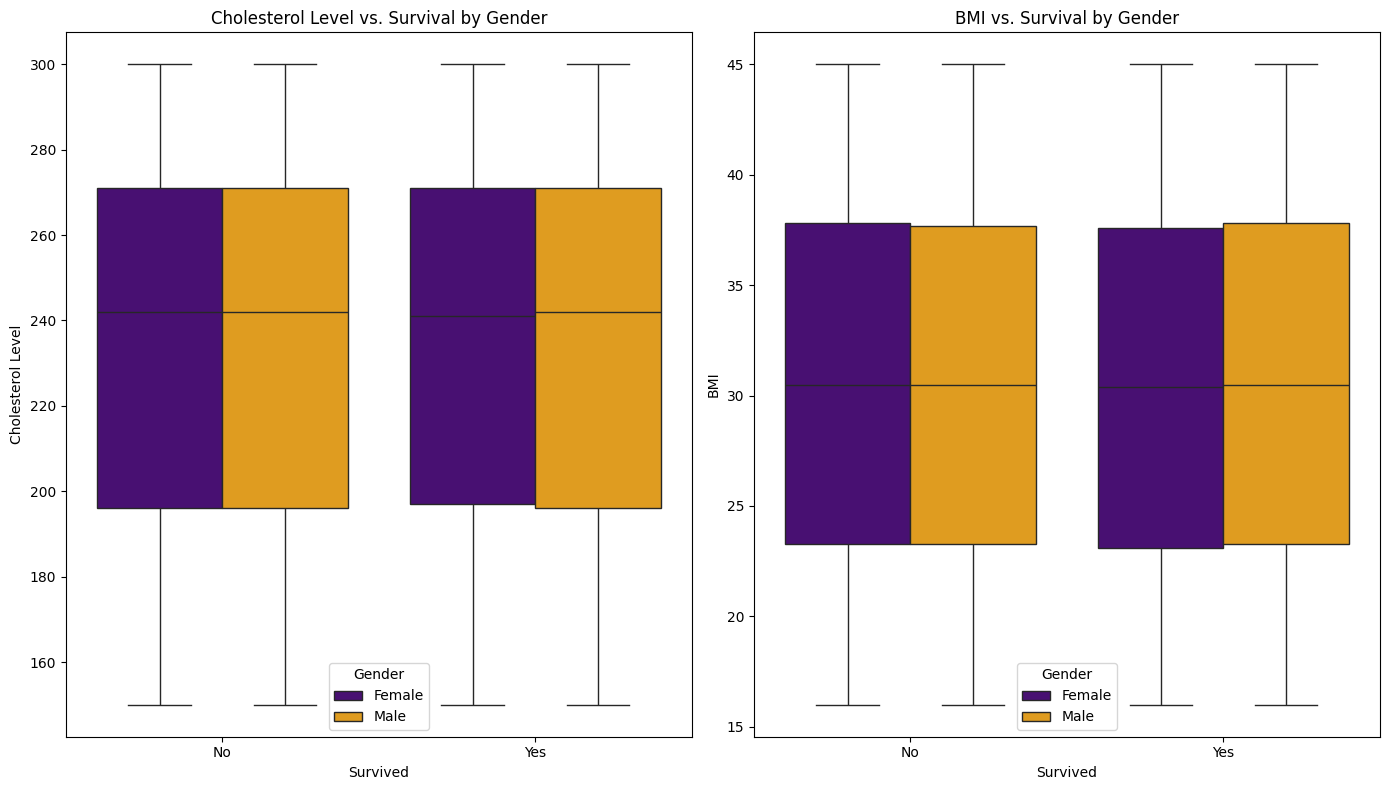

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Veri setini yükle
data = pd.read_csv("lung-cancer.csv")

# Cinsiyete göre ayrılmış veri kümeleri
female_data = data[data['gender'] == 'Female']
male_data = data[data['gender'] == 'Male']

# Renk paletini ayarla (mor ve lacivert tonları)
palette = sns.color_palette(['indigo', 'orange'])

# Kutu grafiği (boxplot) ile görselleştirme
plt.figure(figsize=(14, 8))

# Cholesterol Level vs. Survival by Gender
plt.subplot(1, 2, 1)
sns.boxplot(x='survived', y='cholesterol_level', hue='gender', data=data, orient='v', palette=palette)
plt.title('Cholesterol Level vs. Survival by Gender')
plt.xlabel('Survived')
plt.ylabel('Cholesterol Level')
plt.legend(title='Gender')
plt.xticks([0, 1], ['No', 'Yes'])

# BMI vs. Survival by Gender
plt.subplot(1, 2, 2)
sns.boxplot(x='survived', y='bmi', hue='gender', data=data, orient='v', palette=palette)
plt.title('BMI vs. Survival by Gender')
plt.xlabel('Survived')
plt.ylabel('BMI')
plt.legend(title='Gender')
plt.xticks([0, 1], ['No', 'Yes'])

plt.tight_layout()
plt.show()


15.Veri kümesindeki ülkelerin kansere bağlı ölüm oranlarını hesaplar ve görselleştirir.

Ülkelere Göre Kansere Bağlı Ölüm Oranları:
country
Estonia           0.205867
Hungary           0.205977
Latvia            0.207624
Denmark           0.210326
Greece            0.210570
Luxembourg        0.211382
Slovenia          0.212096
Germany           0.212105
Lithuania         0.213608
Netherlands       0.215430
Poland            0.215681
Romania           0.216122
Spain             0.217040
Portugal          0.218829
Malta             0.220000
Finland           0.220498
Italy             0.220918
Cyprus            0.221030
Belgium           0.221922
Bulgaria          0.223118
Slovakia          0.223312
Sweden            0.225850
Ireland           0.226956
France            0.227399
Czech Republic    0.227649
Austria           0.227715
Croatia           0.233549
Name: survived, dtype: float64


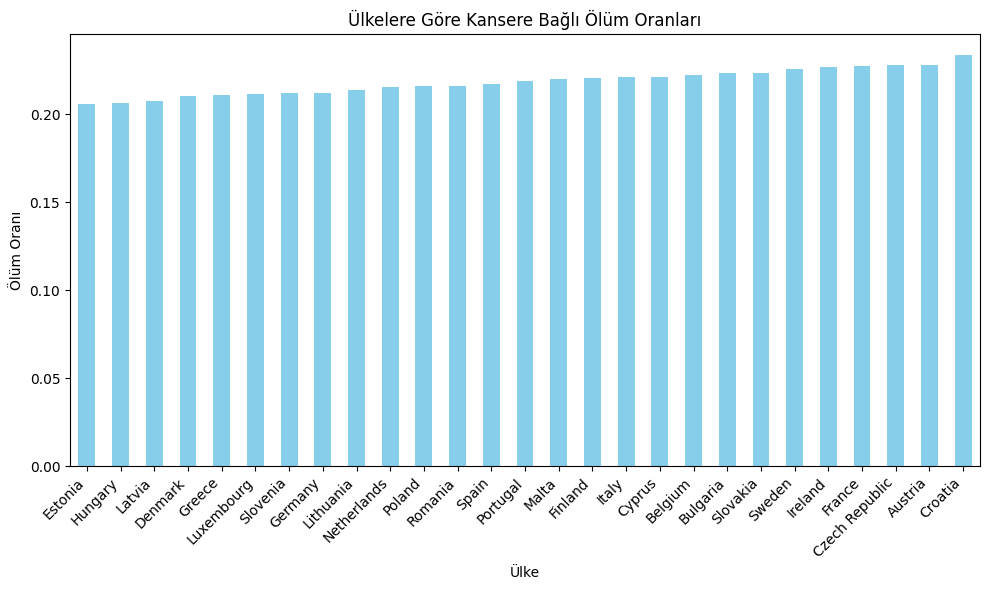

In [30]:
# Verileri oku
file_path = "lung-cancer.csv"
df = pd.read_csv(file_path)

# Ülkelere göre ölüm oranlarını hesapla
death_rates = df.groupby('country')['survived'].mean().sort_values()

# Ölüm oranlarını tabloda göster
print("Ülkelere Göre Kansere Bağlı Ölüm Oranları:")
print(death_rates)

# Grafik oluştur
plt.figure(figsize=(10, 6))
death_rates.plot(kind='bar', color='skyblue')
plt.title('Ülkelere Göre Kansere Bağlı Ölüm Oranları')
plt.xlabel('Ülke')
plt.ylabel('Ölüm Oranı')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


16.Veri kümesindeki ülkelerin kanseri atlatma oranlarını hesaplar ve görselleştirir

Ülkelere göre kanseri atlatanların Oranı:
country
Estonia           0.205867
Hungary           0.205977
Latvia            0.207624
Denmark           0.210326
Greece            0.210570
Luxembourg        0.211382
Slovenia          0.212096
Germany           0.212105
Lithuania         0.213608
Netherlands       0.215430
Poland            0.215681
Romania           0.216122
Spain             0.217040
Portugal          0.218829
Malta             0.220000
Finland           0.220498
Italy             0.220918
Cyprus            0.221030
Belgium           0.221922
Bulgaria          0.223118
Slovakia          0.223312
Sweden            0.225850
Ireland           0.226956
France            0.227399
Czech Republic    0.227649
Austria           0.227715
Croatia           0.233549
Name: survived, dtype: float64


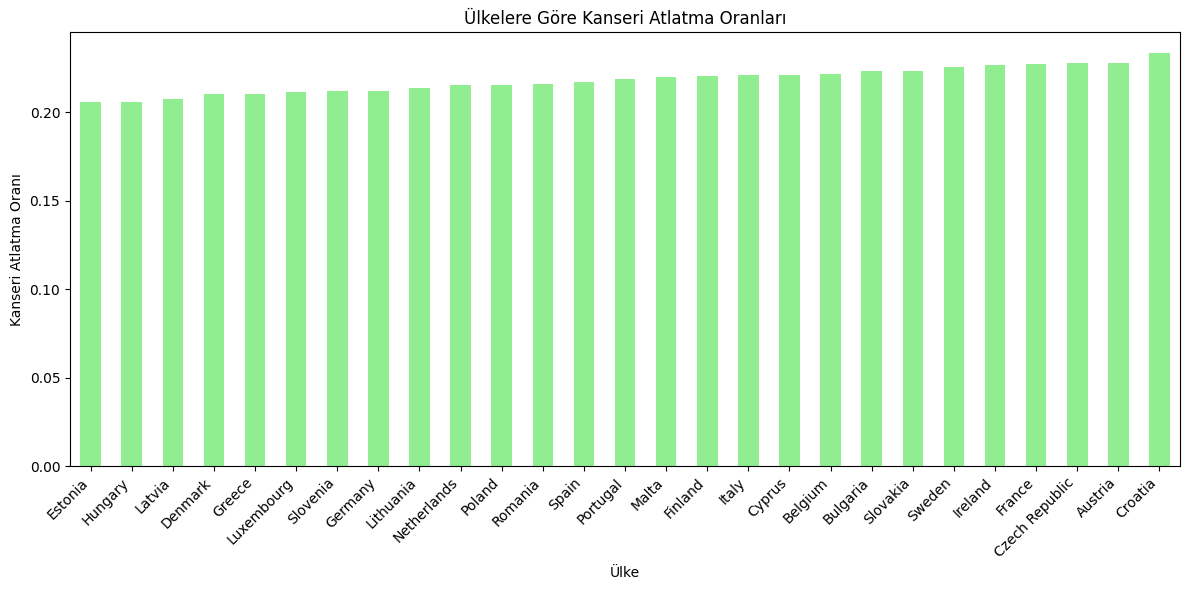

In [31]:
import matplotlib.pyplot as plt
import pandas as pd

# Verileri oku
file_path = "lung-cancer.csv"
df = pd.read_csv(file_path)

# Ülkelere göre kanseri atlatanların oranlarını hesapla
survival_rates = df.groupby('country')['survived'].mean().sort_values()
print("Ülkelere göre kanseri atlatanların Oranı:")
print(survival_rates)

# Grafik oluştur
plt.figure(figsize=(12, 6))
survival_rates.plot(kind='bar', color='lightgreen')
plt.title('Ülkelere Göre Kanseri Atlatma Oranları')
plt.xlabel('Ülke')
plt.ylabel('Kanseri Atlatma Oranı')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



17.Ülkelere Göre Kansere Bağlı Ölenlerin Sayısı

Ülkelere Göre Kansere Bağlı Ölenlerin Sayısı:
country
France            2786
Portugal          2788
Croatia           2842
Slovakia          2852
Austria           2859
Germany           2864
Slovenia          2879
Belgium           2882
Greece            2883
Ireland           2885
Bulgaria          2890
Sweden            2893
Czech Republic    2894
Lithuania         2901
Spain             2904
Cyprus            2904
Denmark           2906
Luxembourg        2910
Finland           2913
Italy             2920
Romania           2927
Latvia            2931
Poland            2931
Netherlands       2939
Estonia           2951
Malta             2964
Hungary           2976
dtype: int64


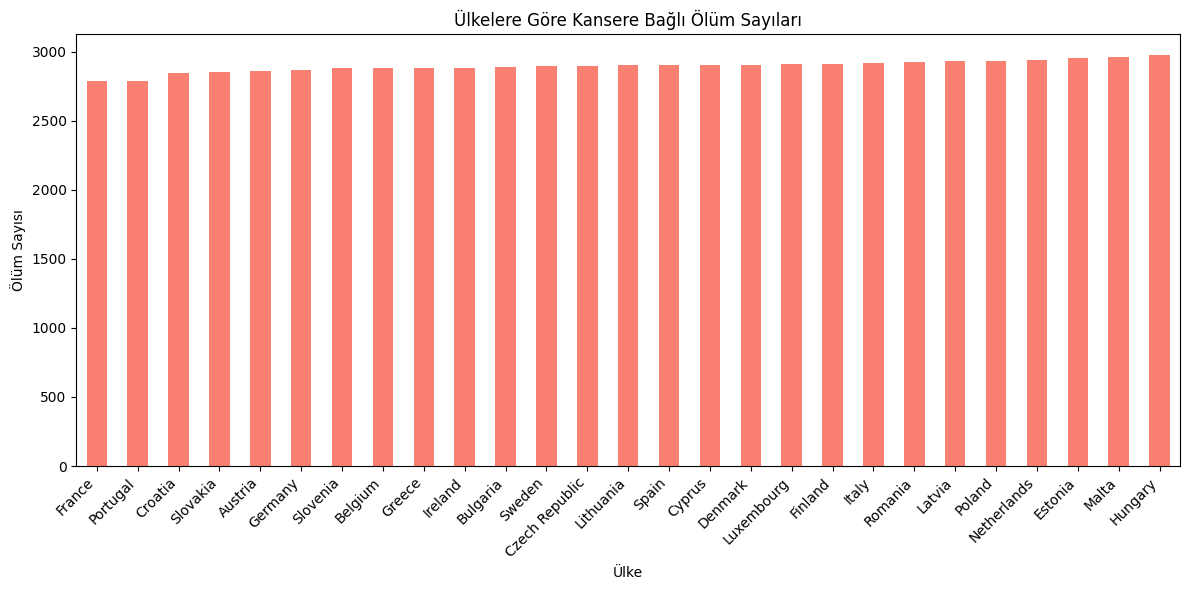

In [32]:
# Verileri oku
file_path = "lung-cancer.csv"
df = pd.read_csv(file_path)

# Ülkelere göre ölüm sayılarını hesapla
death_counts = df[df['survived'] == 0].groupby('country').size().sort_values()
# Ölüm oranlarını tabloda göster
print("Ülkelere Göre Kansere Bağlı Ölenlerin Sayısı:")
print(death_counts)

# Grafik oluştur
plt.figure(figsize=(12, 6))
death_counts.plot(kind='bar', color='salmon')
plt.title('Ülkelere Göre Kansere Bağlı Ölüm Sayıları')
plt.xlabel('Ülke')
plt.ylabel('Ölüm Sayısı')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


18.Ülkelere Göre Kanseri Atlatanların Sayısı

Ülkelere Göre Kanseri Atlatanların Sayısı:
country
Estonia           765
Latvia            768
Greece            769
Germany           771
Hungary           772
Denmark           774
Slovenia          775
Luxembourg        780
Portugal          781
Lithuania         788
Spain             805
Poland            806
Netherlands       807
Romania           807
Slovakia          820
France            820
Belgium           822
Finland           824
Cyprus            824
Italy             828
Bulgaria          830
Malta             836
Austria           843
Sweden            844
Ireland           847
Czech Republic    853
Croatia           866
dtype: int64


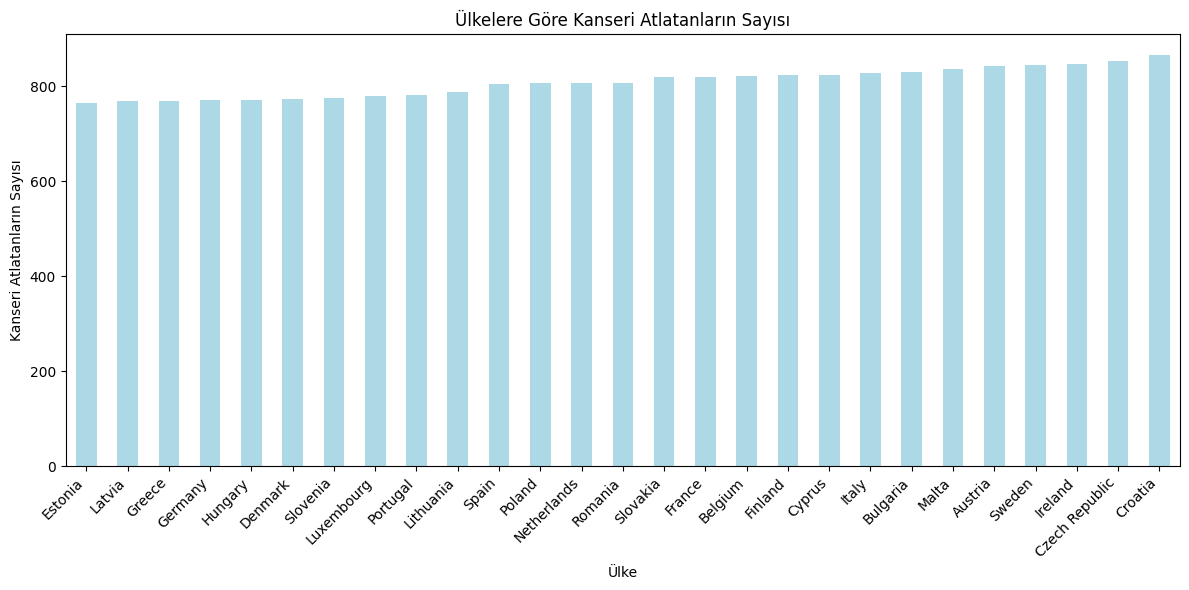

In [33]:
import matplotlib.pyplot as plt
import pandas as pd

# Verileri oku
file_path = "lung-cancer.csv"
df = pd.read_csv(file_path)

# Ülkelere göre kanseri atlatanların sayılarını hesapla
survived_counts = df[df['survived'] == 1].groupby('country').size().sort_values()
print("Ülkelere Göre Kanseri Atlatanların Sayısı:")
print(survived_counts)

# Grafik oluştur
plt.figure(figsize=(12, 6))
survived_counts.plot(kind='bar', color='lightblue')
plt.title('Ülkelere Göre Kanseri Atlatanların Sayısı')
plt.xlabel('Ülke')
plt.ylabel('Kanseri Atlatanların Sayısı')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

19.Bu kod iki farklı boxplot grafiği oluşturur:
1.Kanser Evrelerine Göre Yaş Dağılımı
2.Sigara İçme Durumuna Göre Kolesterol Seviyeleri
Her iki grafik de gruplar arasındaki dağılımları görselleştirerek karşılaştırmayı sağlar.

C:\Users\Berivan Yalçın\AppData\Local\Temp\ipykernel_8808\3356436893.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Kanser Evresi')


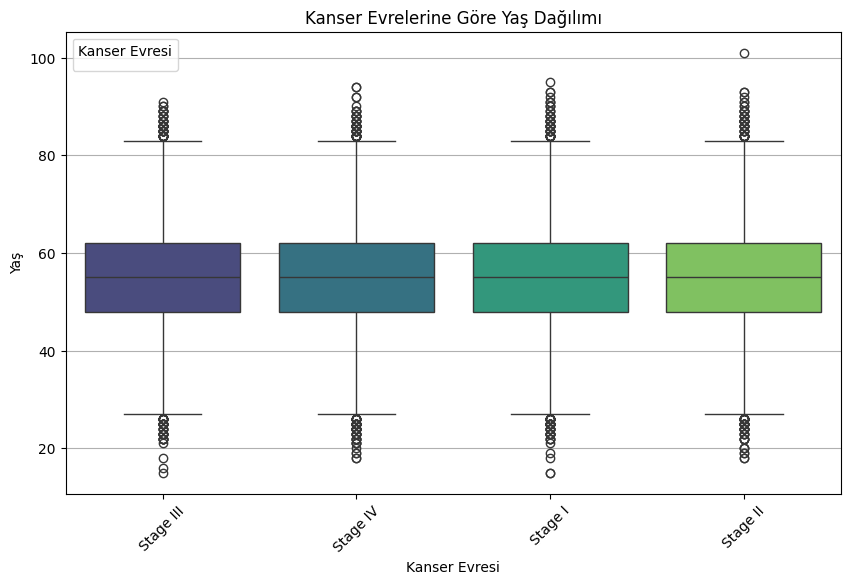

C:\Users\Berivan Yalçın\AppData\Local\Temp\ipykernel_8808\3356436893.py:27: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Sigara İçme Durumu')


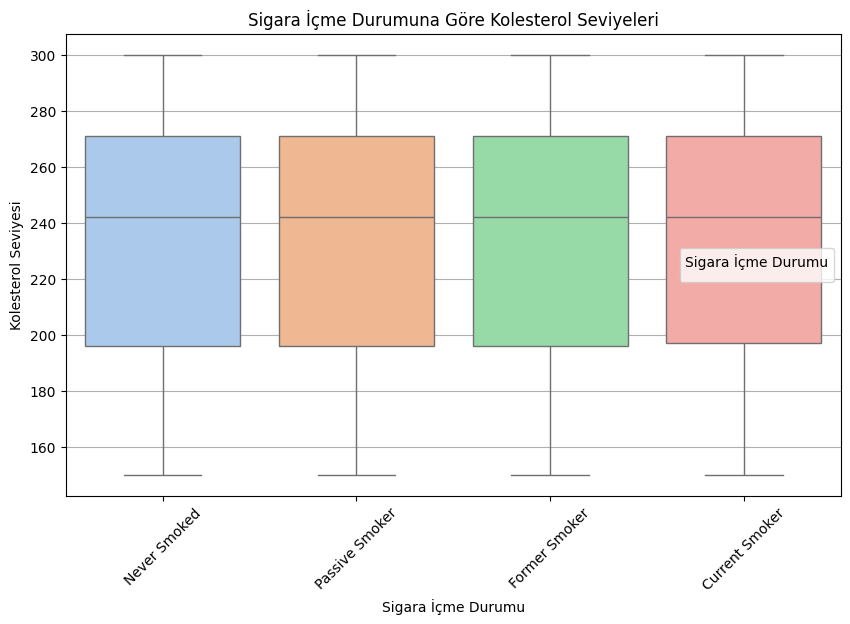

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Veriyi yükleyelim
data = pd.read_csv("lung-cancer.csv")

# Kanser evrelerine göre yaş dağılımını karşılaştırma
plt.figure(figsize=(10, 6))
sns.boxplot(x='cancer_stage', y='age', data=data, palette='viridis', hue='cancer_stage', dodge=False)
plt.title('Kanser Evrelerine Göre Yaş Dağılımı')
plt.xlabel('Kanser Evresi')
plt.ylabel('Yaş')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend(title='Kanser Evresi')
plt.show()

# Sigara içme durumuna göre kolesterol seviyelerini karşılaştırma
plt.figure(figsize=(10, 6))
sns.boxplot(x='smoking_status', y='cholesterol_level', data=data, palette='pastel', hue='smoking_status', dodge=False)
plt.title('Sigara İçme Durumuna Göre Kolesterol Seviyeleri')
plt.xlabel('Sigara İçme Durumu')
plt.ylabel('Kolesterol Seviyesi')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend(title='Sigara İçme Durumu')
plt.show()


21.Bu kod, kolesterol seviyelerinin normal dağılıma ne kadar uyduğunu görselleştirmek için bir Q-Q (Quantile-Quantile) plot oluşturur.
Eğer veriler normal dağılıma tam olarak uyuyorsa, noktalar düz bir çizgi boyunca yayılır. Eğri, noktaların çizgi üzerinde olması gereken teorik normal dağılımı temsil eder. Buna dayanarak, çizgiye ne kadar yakın noktaların oluşturduğu yayılım, veri setinin normal dağılıma ne kadar yakın olduğunu gösterir.

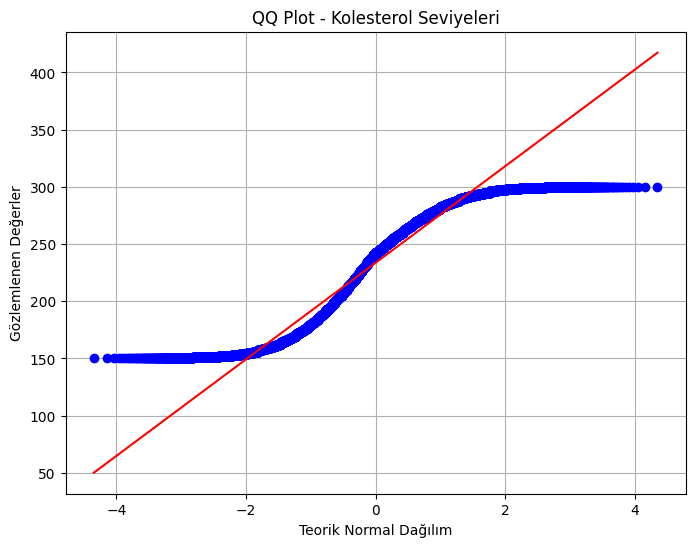

In [35]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# CSV dosyasını yükleyin
data = pd.read_csv("lung-cancer.csv")

# Örnek bir sütunu seçin (örneğin, kolesterol seviyeleri)
sample_data = data['cholesterol_level'].dropna()  # NaN değerleri kaldır

# QQ plot oluşturun
plt.figure(figsize=(8, 6))
stats.probplot(sample_data, dist="norm", plot=plt)
plt.title('QQ Plot - Kolesterol Seviyeleri')
plt.xlabel('Teorik Normal Dağılım')
plt.ylabel('Gözlemlenen Değerler')
plt.grid(True)
plt.show()

22.Akciğer kanserinin ülke bazındaki vakalarının coğrafi dağılımını folium kütüphanesi ile görselleştirmektedir

In [36]:
import pandas as pd
import folium
from geopy.geocoders import Nominatim
from collections import Counter

# CSV dosyasını okuyalım
df = pd.read_csv('lung-cancer.csv')

# Ülke adlarını koordinatlara dönüştürmek için geopy kullanıyoruz
geolocator = Nominatim(user_agent="lung-cancer-map")

# Her ülke için koordinatları depolamak için bir sözlük oluşturuyoruz
country_coords = {}

# Ülkelerin koordinatlarını alıyoruz
for country in df['country'].unique():
    location = geolocator.geocode(country)
    if location:
        country_coords[country] = (location.latitude, location.longitude)
    else:
        print(f"Koordinatlar bulunamadı: {country}")

# Ülke bazında vaka sayılarını ve sigara içme durumlarını hesaplayalım
country_counts = Counter(df['country'])

# Folium haritasını oluşturuyoruz
map = folium.Map(location=[20, 0], zoom_start=2)

# En yüksek vaka sayısını bulalım
max_cases = max(country_counts.values())

# Her ülke için işaretçi ekliyoruz, vaka sayısına göre renklendirme yapacağız
for country, count in country_counts.items():
    if country in country_coords:
        lat, lon = country_coords[country]
        
        # Vaka sayısına göre daire işaretçileri ekliyoruz
        radius = 10 + 10 * (count / max_cases)
        color = 'red' if count == max_cases else 'blue'
        popup_text = f"{country}: {count} cases"
        folium.CircleMarker(location=[lat, lon], radius=radius, color=color, fill=True, fill_color=color, popup=popup_text).add_to(map)
        
        # Sigara içme durumuna göre ikon işaretçileri ekliyoruz
        smoking_status = df[df['country'] == country]['smoking_status'].values[0]
        if smoking_status == 'Current Smoker':
            icon = folium.Icon(color='orange', icon='cloud')
        elif smoking_status == 'Former Smoker':
            icon = folium.Icon(color='green', icon='cloud')
        elif smoking_status == 'Never Smoked':
            icon = folium.Icon(color='blue', icon='cloud')
        else:
            icon = folium.Icon(color='gray', icon='cloud')
        folium.Marker(location=[lat+0.1, lon], icon=icon, popup=f"{country}: {smoking_status} ({count} cases)").add_to(map)

# Haritayı HTML dosyası olarak kaydediyoruz
map.save('lung_cancer_map.html')

print("Harita 'lung_cancer_map.html' dosyasına kaydedildi.")


Harita 'lung_cancer_map.html' dosyasına kaydedildi.


Mavi Halka: Bu halka, bir ülkenin akciğer kanseri vakalarının göreceli düşük olduğunu gösterir. Yani, bu halka içindeki ülkelerde vaka sayıları daha azdır.

Kırmızı Halka: Kırmızı halka ise bir ülkenin akciğer kanseri vakalarının göreceli yüksek olduğunu gösterir. Yani, bu halka içindeki ülkelerde vaka sayıları daha fazladır.

Akciğer kanseri vakalarının coğrafi dağılımını incelemek ve farklı ülkeler arasındaki sağlık verileri farklılıklarını gözlemlemek için güçlü bir araç sunmaktadır.








23.Bu test, iki farklı grup arasında sayısal bir değişkenin (burada BMI) ortalamaları arasında istatistiksel olarak anlamlı bir fark olup olmadığını belirlemek için kullanılır.

In [37]:
from scipy.stats import ttest_ind

# Veri setinizdeki sigara içenlerin ve içmeyenlerin BMI değerlerini gruplara ayırın
smokers_bmi = data[data['smoking_status'] == 'Current Smoker']['bmi']
non_smokers_bmi = data[data['smoking_status'] == 'Never Smoked']['bmi']

# Bağımsız iki örnek t testi uygulayın
t_statistic, p_value = ttest_ind(smokers_bmi, non_smokers_bmi, equal_var=False)

print("T statistic:", t_statistic)
print("P value:", p_value)


T statistic: -0.3450519684136582
P value: 0.7300567520917935


P-değeri 0.05'ten büyük olduğu için, bu veri setinde sigara içenlerle içmeyenler arasında BMI değerleri açısından istatistiksel olarak anlamlı bir fark olmadığı çıkarımını yapabiliriz. Bu durum, bu veri setinde sigara içmenin BMI üzerinde belirgin bir etkisinin olmadığını ya da bu etkinin bu örneklemde gözlemlenmediğini göstermektedir.

Tüm bu sonuçlar, veri setinizdeki sigara içenler ve içmeyenler arasında BMI değerleri açısından istatistiksel bir fark olmadığına işaret etmektedir. Bu bulgu, sigara içmenin bu örnekteki bireylerin vücut kitle indeksine etkisinin istatistiksel olarak anlamlı olmadığını gösterir.

24.Akciğer kanser veri setinde farklı kanser evrelerine (Stage I, Stage II, Stage III) sahip gruplar arasında BMI değerlerinin ortalamaları arasında istatistiksel bir fark olup olmadığını test ediyor.

In [38]:
from scipy.stats import f_oneway

# Örneğin, kanser evrelerine göre BMI değerlerini gruplara ayırın
stage1_bmi = data[data['cancer_stage'] == 'Stage I']['bmi']
stage2_bmi = data[data['cancer_stage'] == 'Stage II']['bmi']
stage3_bmi = data[data['cancer_stage'] == 'Stage III']['bmi']

# Anova testi uygulayın
f_statistic, p_value = f_oneway(stage1_bmi, stage2_bmi, stage3_bmi)

print("F statistic:", f_statistic)
print("P value:", p_value)


F statistic: 1.3291157657200303
P value: 0.2647174631004751


F statistic (F istatistiği): 1.329
F istatistiği, gruplar arasındaki varyans farkının bir ölçüsüdür. Buradaki değer 1.329 olarak bulunmuş. Genellikle, F istatistiği ne kadar büyükse, gruplar arasındaki fark o kadar belirgindir. Ancak yorum yaparken p değeri ile birlikte değerlendirilmesi gereklidir.

P value (P değeri): 0.265
P değeri, ANOVA testinin hipotezini değerlendirmek için kullanılır. Null hipotez genellikle "gruplar arasında istatistiksel olarak anlamlı bir fark yoktur" şeklindedir. Burada elde edilen 0.265 p değeri, test edilen hipotezi reddetmeye yetecek düzeyde bir kanıt sağlamadığını gösterir. Yani, kanser evreleri arasında BMI değerlerinin ortalamaları açısından istatistiksel olarak anlamlı bir fark bulunmadığını söyleyebiliriz.
Sonuç olarak, elde edilen F istatistiği, gruplar arasındaki varyans farkını gösterirken; P değeri ise bu farkın istatistiksel olarak anlamlı olup olmadığını değerlendirir. Burada bulunan F değeri, gruplar arasında anlamlı bir fark olmadığını gösterirken, P değeri de bu sonucu desteklemektedir. Dolayısıyla, kanser evreleri arasında BMI değerlerinin ortalamaları açısından istatistiksel olarak anlamlı bir fark bulunmadığı sonucuna varabiliriz.


25.Korelasyon analizi, iki sürekli değişken arasındaki ilişkiyi değerlendirmek için kullanılır.( BMI ile kolesterol seviyeleri )

In [39]:
# BMI ve kolesterol seviyeleri arasındaki Pearson korelasyon katsayısını hesaplayalım
correlation = data['bmi'].corr(data['cholesterol_level'])

print("Correlation coefficient (Pearson):", correlation)


Correlation coefficient (Pearson): 0.7468874365114772


Korelasyon katsayısı +1'e yakınsa, pozitif yönlü güçlü bir ilişki olduğunu; -1'e yakınsa, negatif yönlü güçlü bir ilişki olduğunu belirtir. 0'a yakınsa, ilişki zayıf veya yoktur.

0.75 değeri pozitif yönlü bir ilişki olduğunu ve ilişkinin orta düzeyde güçlü olduğunu gösterir. Yani, 'bmi' değeri ile 'cholesterol_level' değeri arasında pozitif doğrusal bir ilişki bulunmaktadır; bu da genellikle 'bmi' değeri arttıkça 'cholesterol_level' değerinin de arttığını gösterir.








26.Kanser evrelerine göre BMI değerlerinin farklı gruplara ayrılması ve bu gruplar arasında ANOVA (Analysis of Variance) testi yapılması için kullanılıyor. 

In [40]:
from scipy.stats import f_oneway

# Örneğin, kanser evrelerine göre BMI değerlerini gruplara ayırın
stage1_bmi = data[data['cancer_stage'] == 'Stage I']['bmi']
stage2_bmi = data[data['cancer_stage'] == 'Stage II']['bmi']
stage3_bmi = data[data['cancer_stage'] == 'Stage III']['bmi']

# Anova testi uygulayın
f_statistic, p_value = f_oneway(stage1_bmi, stage2_bmi, stage3_bmi)

print("F statistic:", f_statistic)
print("P value:", p_value)


F statistic: 1.3291157657200303
P value: 0.2647174631004751


Elde edilen F istatistiği 1.3291 olarak bulunmuş. Bu değer, gruplar arasındaki varyans farklılıklarının görece küçük olduğunu veya grup ortalamaları arasında çok fazla fark olmadığını işaret edebilir.
P değeri ise 0.2647 olarak bulunmuş. Bu değer 0.05'ten büyük olduğu için, kanser evreleri (Stage I, Stage II, Stage III) arasında BMI değerleri açısından istatistiksel olarak anlamlı bir fark bulunmadığını gösteriyor. Yani, bu sonuçlara göre, kanser evrelerine bağlı olarak BMI değerleri arasında istatistiksel olarak anlamlı bir farklılık yoktur.

27.Bu kod,Kaplan-Meier yöntemini kullanarak veri setimizdeki farklı tedavi tipleri için hayatta kalma analizi yapıyor.

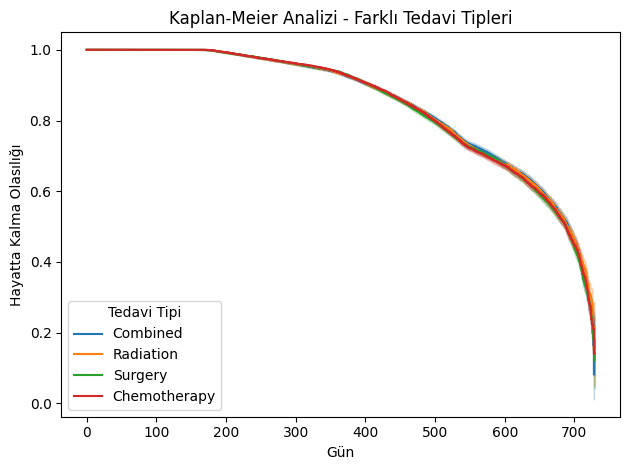

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter

# Veri setini yükleyin
data = pd.read_csv("lung-cancer.csv")

# Tarih sütunlarını datetime tipine dönüştürme
data['beginning_of_treatment_date'] = pd.to_datetime(data['beginning_of_treatment_date'])
data['end_treatment_date'] = pd.to_datetime(data['end_treatment_date'])

# Tedavi süresini hesaplayın (gün cinsinden)
data['treatment_duration'] = (data['end_treatment_date'] - data['beginning_of_treatment_date']).dt.days

# Kaplan-Meier Fitter'ı tanımla
kmf = KaplanMeierFitter()

# Tedavi tiplerine göre hayatta kalma sürelerini hesapla ve grafiğe çiz
treatment_types = data['treatment_type'].unique()
for treatment in treatment_types:
    treatment_data = data[data['treatment_type'] == treatment]
    kmf.fit(treatment_data['treatment_duration'], event_observed=treatment_data['survived'], label=treatment)
    kmf.plot_survival_function()

# Grafiği göster
plt.title('Kaplan-Meier Analizi - Farklı Tedavi Tipleri')
plt.xlabel('Gün')
plt.ylabel('Hayatta Kalma Olasılığı')
plt.legend(title='Tedavi Tipi')
plt.tight_layout()
plt.show()



Genel Hayatta Kalma Eğrisi: Tüm tedavi tiplerinde hayatta kalma olasılığı başlangıçta 1.0 (yani %100) iken zamanla azalmaktadır. Bu, tedavi süresi ilerledikçe hastaların hayatta kalma olasılığının azaldığını göstermektedir.

Tedavi Tipleri Arasındaki Farklar: Grafik üzerinde farklı tedavi tiplerine ait eğriler neredeyse üst üste binmiş durumda. Bu durum, farklı tedavi tiplerinin hayatta kalma süresi üzerinde önemli bir fark yaratmadığını göstermektedir.

Eğrilerin Düşüş Hızı: Tüm tedavi tiplerinde eğriler benzer bir hızla düşmektedir. Bu da, tedavi süresi ilerledikçe her tedavi tipinde hastaların hayatta kalma olasılıklarının benzer şekilde azaldığını göstermektedir.

Uzun Vadeli Hayatta Kalma: Tedavi süresi 700 güne kadar uzandığında bile bazı hastaların hayatta kaldığı görülmektedir. Bu, bazı hastaların uzun vadeli hayatta kalma olasılığının olduğunu göstermektedir.